In [993]:
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns                  # imports the seaborn package with the imported name 'sns'
sns.set()  
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [994]:
df=pd.read_csv("employmentfortune.csv")
df

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.0,11141,8450,409,0,0,2022,Energy
3,0.000,AES,VA,Utilities: Gas and Electric,NaN,NaN,12617,9100,546,0,-1,2023,Energy
4,-6.522,Alcoa,PA,Metals,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,0.000,Vistra,TX,Energy,NaN,NaN,13728,4910,1227,0,1,2023,Energy
300,6.604,Zoetis,NJ,Pharmaceuticals,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,Zoetis,NJ,Pharmaceuticals,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care
302,14.050,Zoetis,NJ,Pharmaceuticals,1700.0,4403.0,7776,12100,2037,0,2,2022,Health Care


In [995]:
df_error = pd.read_csv('employmentfortune.csv', na_values=["NaN","error","missing","scrape fail", "scrape failed","nan","NA",""])
df_error.dtypes

employment_change_rate          float64
company                          object
location                         object
industry                         object
employees_gained                float64
total_equity_mil                float64
total_revenue_mil                 int64
total_employees                   int64
profit_mil                        int64
relocation                        int64
mergers_buyouts_acquisitions      int64
year                              int64
sector                           object
dtype: object

In [996]:
df_error.isna().sum()

employment_change_rate           0
company                          0
location                         0
industry                         0
employees_gained                76
total_equity_mil                76
total_revenue_mil                0
total_employees                  0
profit_mil                       0
relocation                       0
mergers_buyouts_acquisitions     0
year                             0
sector                           0
dtype: int64

In [997]:
df=df.dropna()
df


,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.0,11141,8450,409,0,0,2022,Energy
4,-6.522,Alcoa,PA,Metals,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
5,-5.426,Alcoa,PA,Metals,-700.0,6284.0,9286,12900,170,0,0,2021,Materials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-5.685,Vistra,TX,Energy,-305.0,8292.0,11443,5365,636,0,1,2021,Energy
298,-2.964,Vistra,TX,Energy,-150.0,4918.0,12077,5060,1274,0,0,2022,Energy
300,6.604,Zoetis,NJ,Pharmaceuticals,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,Zoetis,NJ,Pharmaceuticals,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care


In [998]:
df_clean=df.dropna()
df_clean.shape

(228, 13)

In [999]:
df_clean

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.0,11141,8450,409,0,0,2022,Energy
4,-6.522,Alcoa,PA,Metals,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
5,-5.426,Alcoa,PA,Metals,-700.0,6284.0,9286,12900,170,0,0,2021,Materials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-5.685,Vistra,TX,Energy,-305.0,8292.0,11443,5365,636,0,1,2021,Energy
298,-2.964,Vistra,TX,Energy,-150.0,4918.0,12077,5060,1274,0,0,2022,Energy
300,6.604,Zoetis,NJ,Pharmaceuticals,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,Zoetis,NJ,Pharmaceuticals,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care


In [1000]:
df_clean.corr()

,employment_change_rate,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year
employment_change_rate,1.000000,0.405283,0.067458,0.024879,0.046134,0.017269,0.084684,0.246613,0.059036
employees_gained,0.405283,1.000000,0.146054,0.314641,0.413841,0.098862,0.029421,0.122623,-0.069542
total_equity_mil,0.067458,0.146054,1.000000,0.587351,0.333039,0.545167,0.009238,0.181236,0.011261
total_revenue_mil,0.024879,0.314641,0.587351,1.000000,0.759948,0.740371,-0.007170,0.243906,0.050255
total_employees,0.046134,0.413841,0.333039,0.759948,1.000000,0.366686,0.008645,0.228496,0.028439
profit_mil,0.017269,0.098862,0.545167,0.740371,0.366686,1.000000,-0.014857,0.286432,0.084128
relocation,0.084684,0.029421,0.009238,-0.007170,0.008645,-0.014857,1.000000,0.044240,0.057607
mergers_buyouts_acquisitions,0.246613,0.122623,0.181236,0.243906,0.228496,0.286432,0.044240,1.000000,0.038398
year,0.059036,-0.069542,0.011261,0.050255,0.028439,0.084128,0.057607,0.038398,1.000000


In [1001]:
df.corr()

,employment_change_rate,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year
employment_change_rate,1.000000,0.405283,0.067458,0.024879,0.046134,0.017269,0.084684,0.246613,0.059036
employees_gained,0.405283,1.000000,0.146054,0.314641,0.413841,0.098862,0.029421,0.122623,-0.069542
total_equity_mil,0.067458,0.146054,1.000000,0.587351,0.333039,0.545167,0.009238,0.181236,0.011261
total_revenue_mil,0.024879,0.314641,0.587351,1.000000,0.759948,0.740371,-0.007170,0.243906,0.050255
total_employees,0.046134,0.413841,0.333039,0.759948,1.000000,0.366686,0.008645,0.228496,0.028439
profit_mil,0.017269,0.098862,0.545167,0.740371,0.366686,1.000000,-0.014857,0.286432,0.084128
relocation,0.084684,0.029421,0.009238,-0.007170,0.008645,-0.014857,1.000000,0.044240,0.057607
mergers_buyouts_acquisitions,0.246613,0.122623,0.181236,0.243906,0.228496,0.286432,0.044240,1.000000,0.038398
year,0.059036,-0.069542,0.011261,0.050255,0.028439,0.084128,0.057607,0.038398,1.000000


<AxesSubplot: >

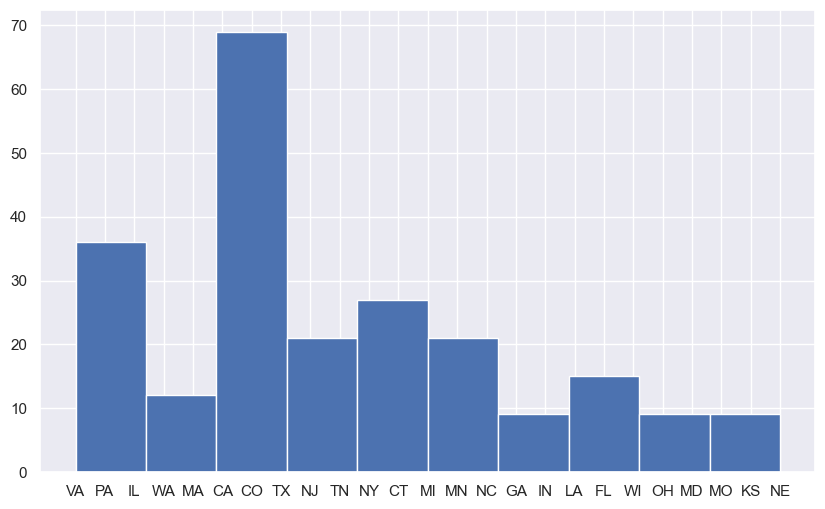

In [1002]:
df_clean['location'].hist()

In [1003]:
df2=smf.ols('employment_change_rate~location',data=df).fit()
df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     employment_change_rate   R-squared:                       0.176
Model:                                OLS   Adj. R-squared:                  0.079
Method:                     Least Squares   F-statistic:                     1.808
Date:                    Thu, 30 Nov 2023   Prob (F-statistic):             0.0151
Time:                            01:40:53   Log-Likelihood:                -917.99
No. Observations:                     228   AIC:                             1886.
Df Residuals:                         203   BIC:                             1972.
Df Model:                              24                                         
Covariance Type:                nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          9.4203      2.302      4.093      0.000       4.882      13.958
location[T.CO]    -8.2382      5.315     -1.550      0.123     -18.719       2.242
location[T.CT]   -15.1163      8.612     -1.755      0.081     -32.096       1.864
location[T.FL]    -9.4148      6.303     -1.494      0.137     -21.843       3.013
location[T.GA]    -5.6725      6.303     -0.900      0.369     -18.101       6.756
location[T.IL]    -6.1406      4.367     -1.406      0.161     -14.751       2.470
location[T.IN]     3.9300      8.612      0.456      0.649     -13.050      20.910
location[T.KS]   -10.6457      8.612     -1.236      0.218     -27.626       6.334
location[T.LA]   -17.7772      6.303     -2.820      0.005     -30.205      -5.349
location[T.MA]    -6.7600      5.315     -1.272      0.205     -17.240       3.720
location[T.MD]   -10.9585      6.303     -1.739      0.084     -23.387       1.470
location[T.MI]     4.1065      6.303      0.651      0.515      -8.322      16.535
location[T.MN]    -4.1033      6.303     -0.651      0.516     -16.531       8.325
location[T.MO]    -2.6407      8.612     -0.307      0.759     -19.621      14.339
location[T.NC]    -8.4559      5.315     -1.591      0.113     -18.936       2.024
location[T.NE]   -12.8733      8.612     -1.495      0.137     -29.853       4.107
location[T.NJ]   -10.3816      4.745     -2.188      0.030     -19.737      -1.026
location[T.NY]     1.0676      3.729      0.286      0.775      -6.285       8.420
location[T.OH]    -9.5533      8.612     -1.109      0.269     -26.533       7.427
location[T.PA]   -11.5681      4.367     -2.649      0.009     -20.179      -2.958
location[T.TN]    -9.7687      5.315     -1.838      0.068     -20.249       0.712
location[T.TX]   -12.6793      3.890     -3.259      0.001     -20.350      -5.009
location[T.VA]    -6.6885      6.303     -1.061      0.290     -19.117       5.740
location[T.WA]    18.0373      8.612      2.094      0.037       1.057      35.017
location[T.WI]   -15.1340      8.612     -1.757      0.080     -32.114       1.846
==============================================================================
Omnibus:                      125.514   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1230.918
Skew:                           1.928   Prob(JB):                    5.12e-268
Kurtosis:                      13.710   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1004]:
df2=smf.ols('employment_change_rate~company+location+industry+employees_gained+total_equity_mil+total_revenue_mil+total_employees+profit_mil+relocation+mergers_buyouts_acquisitions+year+sector',data=df).fit()
df2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     employment_change_rate   R-squared:                       0.633
Model:                                OLS   Adj. R-squared:                  0.413
Method:                     Least Squares   F-statistic:                     2.880
Date:                    Thu, 30 Nov 2023   Prob (F-statistic):           1.22e-08
Time:                            01:40:53   Log-Likelihood:                -825.84
No. Observations:                     228   AIC:                             1824.
Df Residuals:                         142   BIC:                             2119.
Df Model:                              85                                         
Covariance Type:                nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -3147.3583   1788.239     -1.760      0.081   -6682.370     387.653
company[T.AT&T]                                             -120.5558     58.817     -2.050      0.042    -236.827      -4.285
company[T.Alcoa]                                              -9.7391      8.609     -1.131      0.260     -26.757       7.279
company[T.Allstate]                                           31.5172     18.670      1.688      0.094      -5.390      68.424
company[T.Amazon]                                            -50.7077     36.621     -1.385      0.168    -123.101      21.685
company[T.American Tower]                                     -5.2072      5.548     -0.939      0.350     -16.175       5.760
company[T.Amgen]                                             -87.5467     49.058     -1.785      0.076    -184.525       9.432
company[T.Apple]                                             -29.5967     22.220     -1.332      0.185     -73.522      14.328
company[T.Archer Daniels Midland]                            -24.6229     13.797     -1.785      0.076     -51.897       2.651
company[T.Arrow Electronics]                                 -99.5825     57.834     -1.722      0.087    -213.909      14.744
company[T.AutoZone]                                          -15.0022     12.354     -1.214      0.227     -39.425       9.420
company[T.Automatic Data Processing]                         -57.4826     33.534     -1.714      0.089    -123.772       8.807
company[T.BJ's Wholesale Club]                                 1.4966      8.043      0.186      0.853     -14.403      17.396
company[T.Bed Bath & Beyond]                                 -23.3146     12.711     -1.834      0.069     -48.442       1.813
company[T.Blackstone]                                         -5.0954     10.022     -0.508      0.612     -24.907      14.716
company[T.Boeing]                                           -100.8505     59.406     -1.698      0.092    -218.284      16.583
company[T.Booking Holdings]                                  -12.9448      9.854     -1.314      0.191     -32.424       6.534
company[T.BorgWarner]                                        -33.5793     20.701     -1.622      0.107     -74.502       7.343
company[T.C.H. Robinson Worldwide]                           -63.4500     37.303     -1.701      0.091    -137.192      10.292
company[T.CBRE Group]                                        -93.0351     56.138     -1.657      0.100    -204.009      17.939
company[T.Cisco Systems]                                     -62.6139     32.661     -1.917      0.057    -127.178    

In [1005]:
df3=smf.ols('employment_change_rate~location+employees_gained+total_equity_mil+total_revenue_mil+total_employees+profit_mil+relocation+mergers_buyouts_acquisitions+year+sector',data=df).fit()
df3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     employment_change_rate   R-squared:                       0.441
Model:                                OLS   Adj. R-squared:                  0.295
Method:                     Least Squares   F-statistic:                     3.020
Date:                    Thu, 30 Nov 2023   Prob (F-statistic):           7.13e-08
Time:                            01:40:53   Log-Likelihood:                -873.79
No. Observations:                     228   AIC:                             1844.
Df Residuals:                         180   BIC:                             2008.
Df Model:                              47                                         
Covariance Type:                nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                               -3612.2808   2089.924     -1.728      0.086   -7736.184     511.622
location[T.CO]                             -7.3491      6.249     -1.176      0.241     -19.680       4.982
location[T.CT]                            -12.1504      7.798     -1.558      0.121     -27.537       3.236
location[T.FL]                             -6.8079      6.210     -1.096      0.274     -19.062       5.446
location[T.GA]                             16.5942     12.982      1.278      0.203      -9.022      42.211
location[T.IL]                              0.6777      5.767      0.118      0.907     -10.702      12.057
location[T.IN]                              3.6790      9.126      0.403      0.687     -14.328      21.686
location[T.KS]                              0.3169     10.071      0.031      0.975     -19.555      20.189
location[T.LA]                             -9.1549      7.461     -1.227      0.221     -23.877       5.567
location[T.MA]                              0.9247      5.967      0.155      0.877     -10.850      12.699
location[T.MD]                              0.0012     11.783      0.000      1.000     -23.249      23.251
location[T.MI]                             -9.6765      7.993     -1.211      0.228     -25.449       6.096
location[T.MN]                             14.6766     12.034      1.220      0.224      -9.070      38.423
location[T.MO]                             -2.8099     10.515     -0.267      0.790     -23.558      17.938
location[T.NC]                              0.4957      5.619      0.088      0.930     -10.592      11.583
location[T.NE]                              8.3002     14.410      0.576      0.565     -20.134      36.734
location[T.NJ]                             -7.4666      4.915     -1.519      0.130     -17.164       2.231
location[T.NY]                              2.7779      4.638      0.599      0.550      -6.374      11.930
location[T.OH]                              4.7389      7.078      0.670      0.504      -9.227      18.705
location[T.PA]                             -6.1744      4.930     -1.252      0.212     -15.903       3.555
location[T.TN]                             -0.5991      5.533     -0.108      0.914     -11.516      10.318
location[T.TX]                             -6.5583      5.187     -1.264      0.208     -16.793       3.677
location[T.VA]                             -2.9086      5.970     -0.487      0.627     -14.688       8.871
location[T.WA]                             26.5506     36.289      0.732      0.465     -45.055      98.157
location[T.WI]                             -4.7026      8.677     -0.542      0.589     -21.825      12.419
sector[T.Busine

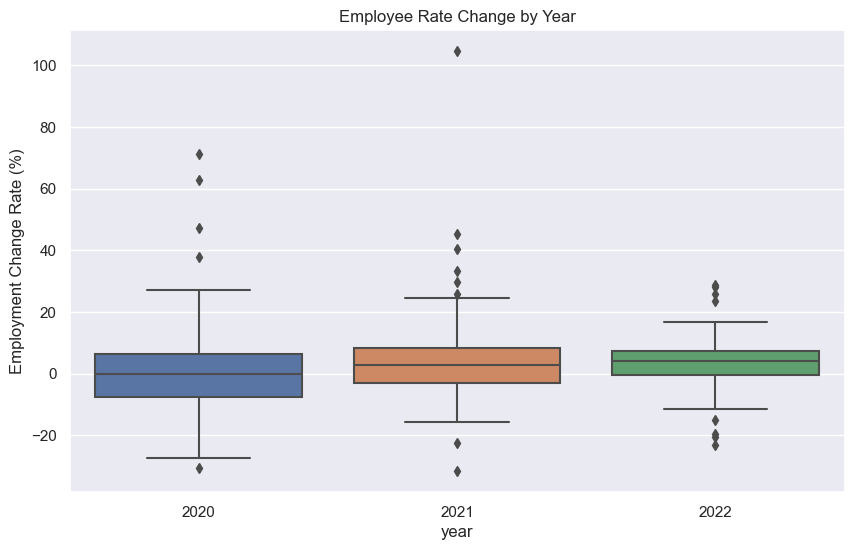

Text(0.5, 0, 'Year')

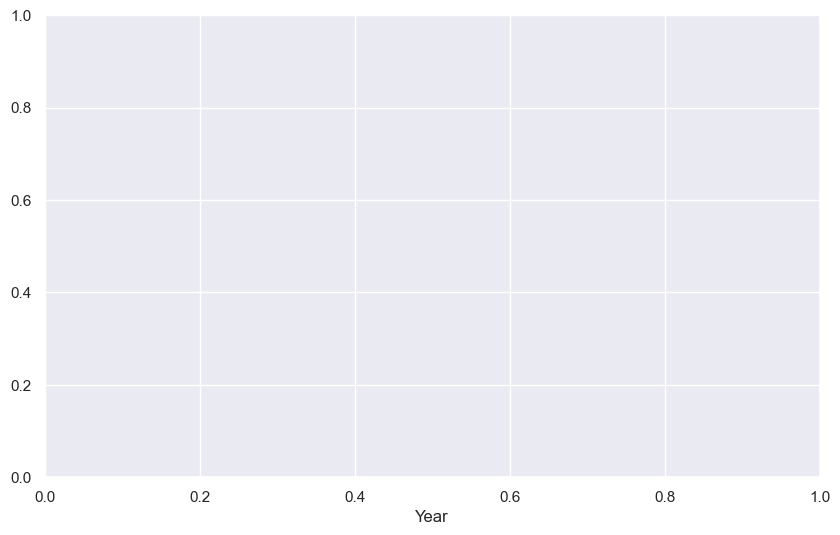

In [1006]:
sns.boxplot(x='year', y='employment_change_rate', data=df_clean)
plt.title("Employee Rate Change by Year")
plt.ylabel('Employment Change Rate (%)')
plt.show()
plt.xlabel("Year")

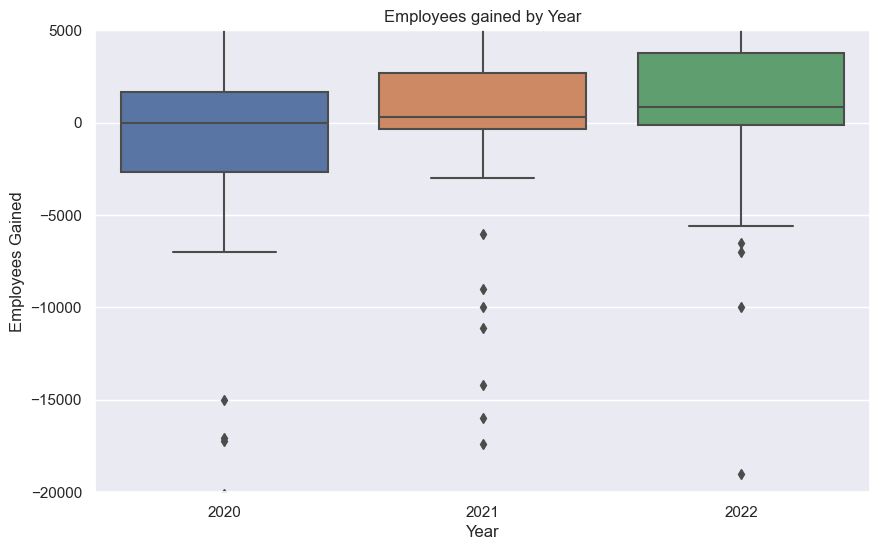

In [1007]:
sns.boxplot(x='year', y='employees_gained', data=df_clean)
plt.title("Employees gained by Year")
plt.ylabel('Employees Gained')
plt.ylim(-20000,5000)
plt.xlabel('Year')
plt.show()

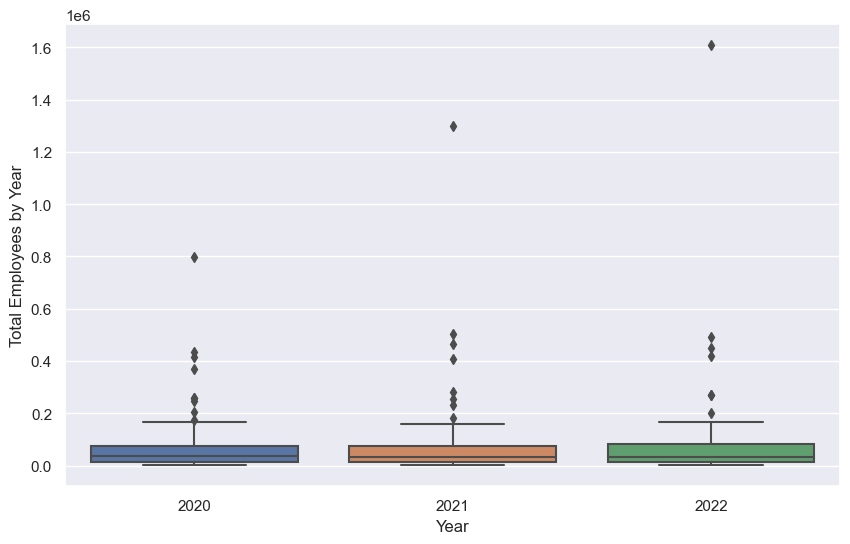

In [1008]:
sns.boxplot(x='year', y='total_employees', data=df_clean)
plt.ylabel('Total Employees by Year')
plt.xlabel('Year')
plt.show()

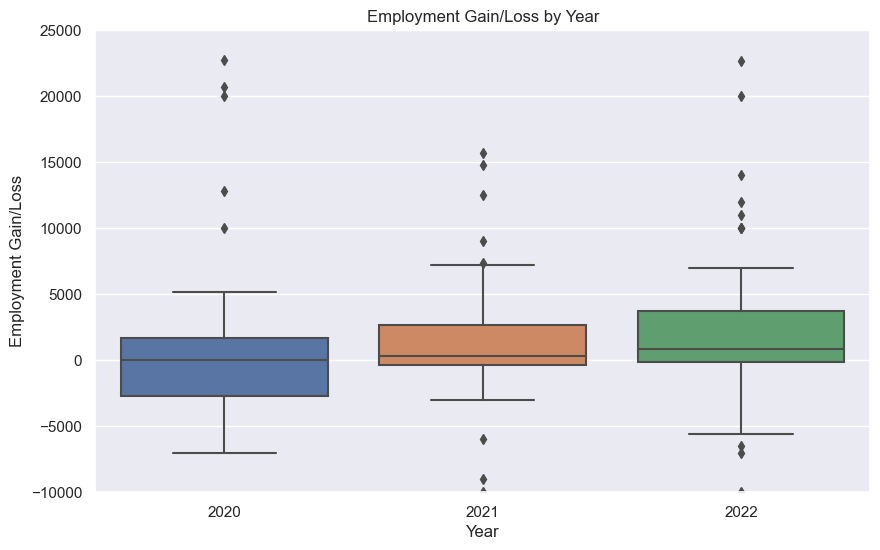

In [1009]:
sns.boxplot(x='year', y='employees_gained', data=df_clean)
plt.title("Employment Gain/Loss by Year")
plt.ylim(-10000,25000)
plt.ylabel('Employment Gain/Loss')
plt.xlabel('Year')
plt.show()

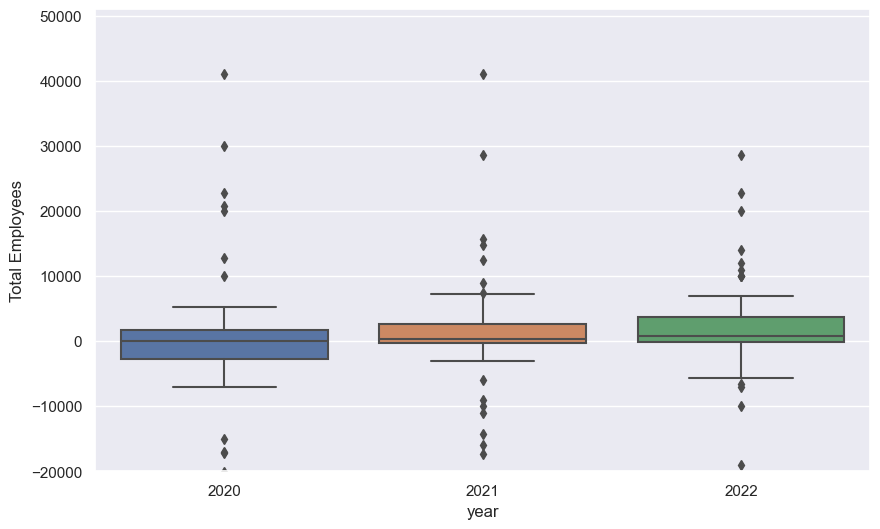

In [1010]:
sns.boxplot(x='year', y='employees_gained', data=df_clean)

plt.ylim(-20000,51000)
plt.ylabel('Total Employees')
plt.show()

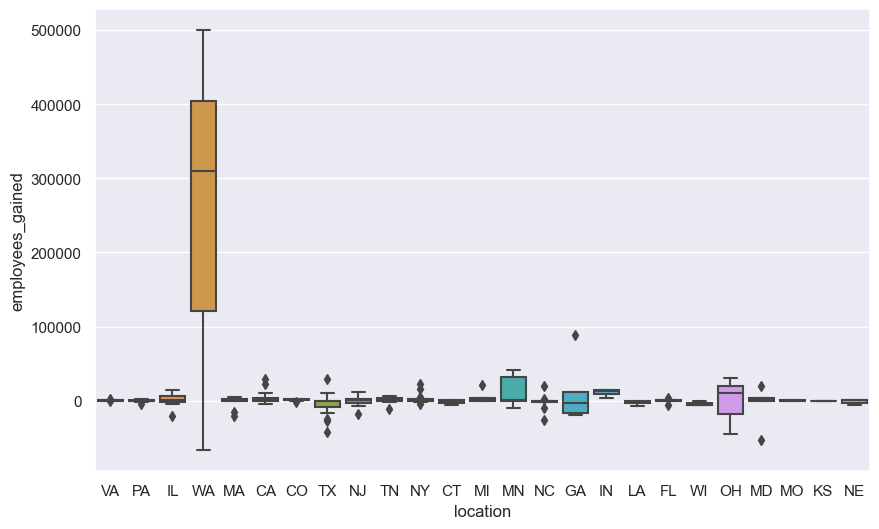

In [1011]:
sns.boxplot(x='location', y='employees_gained', data=df_clean)

plt.show()

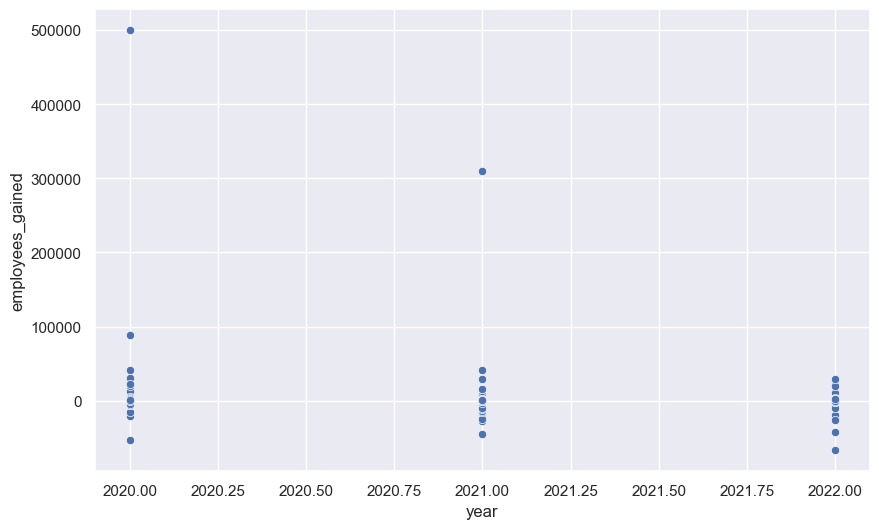

In [1012]:
sns.scatterplot(x='year', y='employees_gained', data=df_clean)
plt.show()

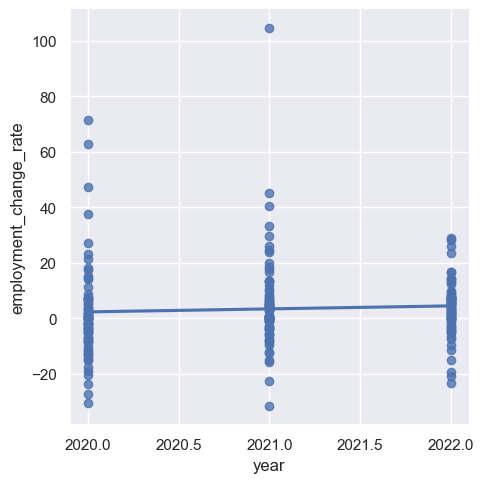

In [1013]:
sns.lmplot(x='year', y='employment_change_rate', data=df_clean, ci=False)
plt.show()

In [1014]:
df_2020=df_clean[df_clean["year"]==2020]
df_2020

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.0,10189,8000,303,0,0,2020,Energy
4,-6.522,Alcoa,PA,Metals,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
8,-8.743,Allstate,IL,Insurance: Property and Casualty (Stock),-4025.0,30217.0,44675,46035,4847,0,1,2020,Financials
12,62.657,Amazon,WA,Internet Services and Retailing,500000.0,93404.0,280522,798000,11588,0,3,2020,Retailing
16,3.007,American Tower,MA,Real Estate,164.0,4568.4,7580,5454,1888,0,1,2020,Financials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-11.719,UGI,PA,Energy,-1500.0,4137.0,7320,12800,256,0,0,2020,Energy
288,-17.403,Union Pacific,NE,Railroads,-6523.0,16958.0,21708,37483,5919,0,0,2020,Transportation
292,-15.091,United States Steel,PA,Metals,-4150.0,3786.0,12937,27500,630,0,0,2020,Materials
296,-2.009,Vistra,TX,Energy,-110.0,8361.0,11809,5475,928,0,0,2020,Energy


In [1015]:
df_2021=df_clean[df_clean["year"]==2021]
df_2021

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.0,9660,8162,46,0,3,2021,Energy
5,-5.426,Alcoa,PA,Metals,-700.0,6284.0,9286,12900,170,0,0,2021,Materials
9,29.731,Allstate,IL,Insurance: Property and Casualty (Stock),12490.0,25127.0,44791,42010,5576,0,1,2021,Financials
13,23.883,Amazon,WA,Internet Services and Retailing,310000.0,138245.0,386064,1298000,21331,0,5,2021,Retailing
17,13.528,American Tower,MA,Real Estate,760.0,9069.6,8042,5618,1691,0,1,2021,Financials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.000,UGI,PA,Energy,0.0,5531.0,6559,11300,532,0,1,2021,Energy
289,3.760,Union Pacific,NE,Railroads,1164.0,14161.0,19533,30960,5349,0,1,2021,Transportation
293,5.096,United States Steel,PA,Metals,1190.0,9010.0,9741,23350,1165,0,0,2021,Materials
297,-5.685,Vistra,TX,Energy,-305.0,8292.0,11443,5365,636,0,1,2021,Energy


In [1016]:
df_2022=df_clean[df_clean["year"]==2022]
df_2022

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.0,11141,8450,409,0,0,2022,Energy
6,7.377,Alcoa,PA,Metals,900.0,6589.0,12152,12200,429,0,0,2022,Materials
10,-0.459,Allstate,IL,Insurance: Property and Casualty (Stock),-250.0,17350.0,53228,54500,1599,0,-1,2022,Financials
14,-4.167,Amazon,WA,Internet Services and Retailing,-67000.0,146043.0,469822,1608000,33364,0,9,2022,Retailing
18,0.204,American Tower,MA,Real Estate,13.0,12408.5,9357,6378,2568,0,0,2022,Financials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,-11.504,UGI,PA,Utilities: Gas and Electric,-1300.0,6074.0,7447,11300,1467,0,0,2022,Energy
290,3.284,Union Pacific,NE,Railroads,1055.0,12163.0,21804,32124,6523,0,0,2022,Transportation
294,-7.335,United States Steel,PA,Metals,-1800.0,10218.0,20275,24540,4174,0,0,2022,Materials
298,-2.964,Vistra,TX,Energy,-150.0,4918.0,12077,5060,1274,0,0,2022,Energy


In [1017]:
df_clean['sector'].unique()

array(['Energy', 'Materials', 'Financials', 'Retailing', 'Health Care',
       'Technology', 'Food, Beverages & Tobacco', 'Wholesalers',
       'Telecommunications', 'Business Services', 'Aerospace & Defense',
       'Motor Vehicles & Parts', 'Transportation', 'Chemicals',
       'Industrials', 'Food & Drug Stores',
       'Hotels, Restaurants & Leisure'], dtype=object)

In [1018]:
df_2020["employees_gained"].mean()

7393.710526315789

In [1019]:
df_2021["employees_gained"].mean()

4294.539473684211

In [1020]:
df_2022["employees_gained"].mean()

458.2631578947368

In [1021]:
df_2020["employees_gained"].median()

-6.5

In [1022]:
df_2020["employees_gained"].median()            

-6.5

In [1023]:
df_2020["employees_gained"].describe()

count        76.000000
mean       7393.710526
std       59211.038891
min      -53000.000000
25%       -2675.000000
50%          -6.500000
75%        1655.750000
max      500000.000000
Name: employees_gained, dtype: float64

In [1024]:
df_clean.describe()

,employment_change_rate,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year
count,228.000000,228.000000,228.000000,228.000000,2.280000e+02,228.000000,228.000000,228.000000,228.000000
mean,3.433947,4048.837719,22458.076807,43903.907895,8.422489e+04,4700.052632,0.008772,1.078947,2021.000000
std,14.974532,40804.143648,46674.790059,66793.964190,1.681578e+05,9928.116974,0.093452,1.962848,0.818293
min,-31.636000,-67000.000000,-18075.000000,5758.000000,1.384000e+03,11.000000,0.000000,-1.000000,2020.000000
25%,-3.621750,-925.000000,2780.500000,10027.250000,1.374000e+04,669.500000,0.000000,0.000000,2020.000000
50%,1.877000,230.000000,6704.500000,16738.500000,3.351100e+04,1578.000000,0.000000,0.000000,2021.000000
75%,7.418500,2652.000000,20267.250000,49430.250000,7.800000e+04,4692.000000,0.000000,1.000000,2022.000000
max,104.548000,500000.000000,294127.000000,469822.000000,1.608000e+06,94680.000000,1.000000,12.000000,2022.000000


In [1025]:
df3=smf.ols('employment_change_rate~company+location+industry+employees_gained+total_equity_mil+total_revenue_mil+total_employees+profit_mil+relocation+mergers_buyouts_acquisitions+year+sector',data=df_clean).fit()
df3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     employment_change_rate   R-squared:                       0.633
Model:                                OLS   Adj. R-squared:                  0.413
Method:                     Least Squares   F-statistic:                     2.880
Date:                    Thu, 30 Nov 2023   Prob (F-statistic):           1.22e-08
Time:                            01:40:57   Log-Likelihood:                -825.84
No. Observations:                     228   AIC:                             1824.
Df Residuals:                         142   BIC:                             2119.
Df Model:                              85                                         
Covariance Type:                nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                  -3147.3583   1788.239     -1.760      0.081   -6682.370     387.653
company[T.AT&T]                                             -120.5558     58.817     -2.050      0.042    -236.827      -4.285
company[T.Alcoa]                                              -9.7391      8.609     -1.131      0.260     -26.757       7.279
company[T.Allstate]                                           31.5172     18.670      1.688      0.094      -5.390      68.424
company[T.Amazon]                                            -50.7077     36.621     -1.385      0.168    -123.101      21.685
company[T.American Tower]                                     -5.2072      5.548     -0.939      0.350     -16.175       5.760
company[T.Amgen]                                             -87.5467     49.058     -1.785      0.076    -184.525       9.432
company[T.Apple]                                             -29.5967     22.220     -1.332      0.185     -73.522      14.328
company[T.Archer Daniels Midland]                            -24.6229     13.797     -1.785      0.076     -51.897       2.651
company[T.Arrow Electronics]                                 -99.5825     57.834     -1.722      0.087    -213.909      14.744
company[T.AutoZone]                                          -15.0022     12.354     -1.214      0.227     -39.425       9.420
company[T.Automatic Data Processing]                         -57.4826     33.534     -1.714      0.089    -123.772       8.807
company[T.BJ's Wholesale Club]                                 1.4966      8.043      0.186      0.853     -14.403      17.396
company[T.Bed Bath & Beyond]                                 -23.3146     12.711     -1.834      0.069     -48.442       1.813
company[T.Blackstone]                                         -5.0954     10.022     -0.508      0.612     -24.907      14.716
company[T.Boeing]                                           -100.8505     59.406     -1.698      0.092    -218.284      16.583
company[T.Booking Holdings]                                  -12.9448      9.854     -1.314      0.191     -32.424       6.534
company[T.BorgWarner]                                        -33.5793     20.701     -1.622      0.107     -74.502       7.343
company[T.C.H. Robinson Worldwide]                           -63.4500     37.303     -1.701      0.091    -137.192      10.292
company[T.CBRE Group]                                        -93.0351     56.138     -1.657      0.100    -204.009      17.939
company[T.Cisco Systems]                                     -62.6139     32.661     -1.917      0.057    -127.178    

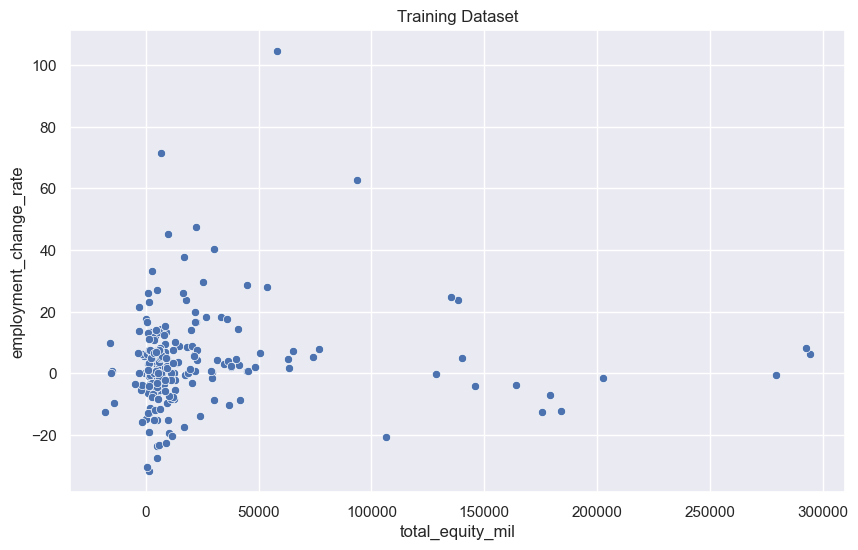

In [1026]:
sns.scatterplot(x='total_equity_mil', y='employment_change_rate', data=df_clean)
plt.title('Training Dataset')
plt.show()

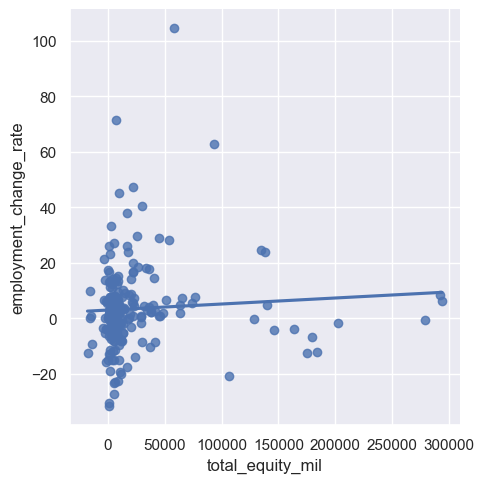

In [1027]:
sns.lmplot(x='total_equity_mil', y='employment_change_rate', data=df_clean, ci=None)

plt.show()

In [1028]:
df_clean.corr()

,employment_change_rate,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year
employment_change_rate,1.000000,0.405283,0.067458,0.024879,0.046134,0.017269,0.084684,0.246613,0.059036
employees_gained,0.405283,1.000000,0.146054,0.314641,0.413841,0.098862,0.029421,0.122623,-0.069542
total_equity_mil,0.067458,0.146054,1.000000,0.587351,0.333039,0.545167,0.009238,0.181236,0.011261
total_revenue_mil,0.024879,0.314641,0.587351,1.000000,0.759948,0.740371,-0.007170,0.243906,0.050255
total_employees,0.046134,0.413841,0.333039,0.759948,1.000000,0.366686,0.008645,0.228496,0.028439
profit_mil,0.017269,0.098862,0.545167,0.740371,0.366686,1.000000,-0.014857,0.286432,0.084128
relocation,0.084684,0.029421,0.009238,-0.007170,0.008645,-0.014857,1.000000,0.044240,0.057607
mergers_buyouts_acquisitions,0.246613,0.122623,0.181236,0.243906,0.228496,0.286432,0.044240,1.000000,0.038398
year,0.059036,-0.069542,0.011261,0.050255,0.028439,0.084128,0.057607,0.038398,1.000000


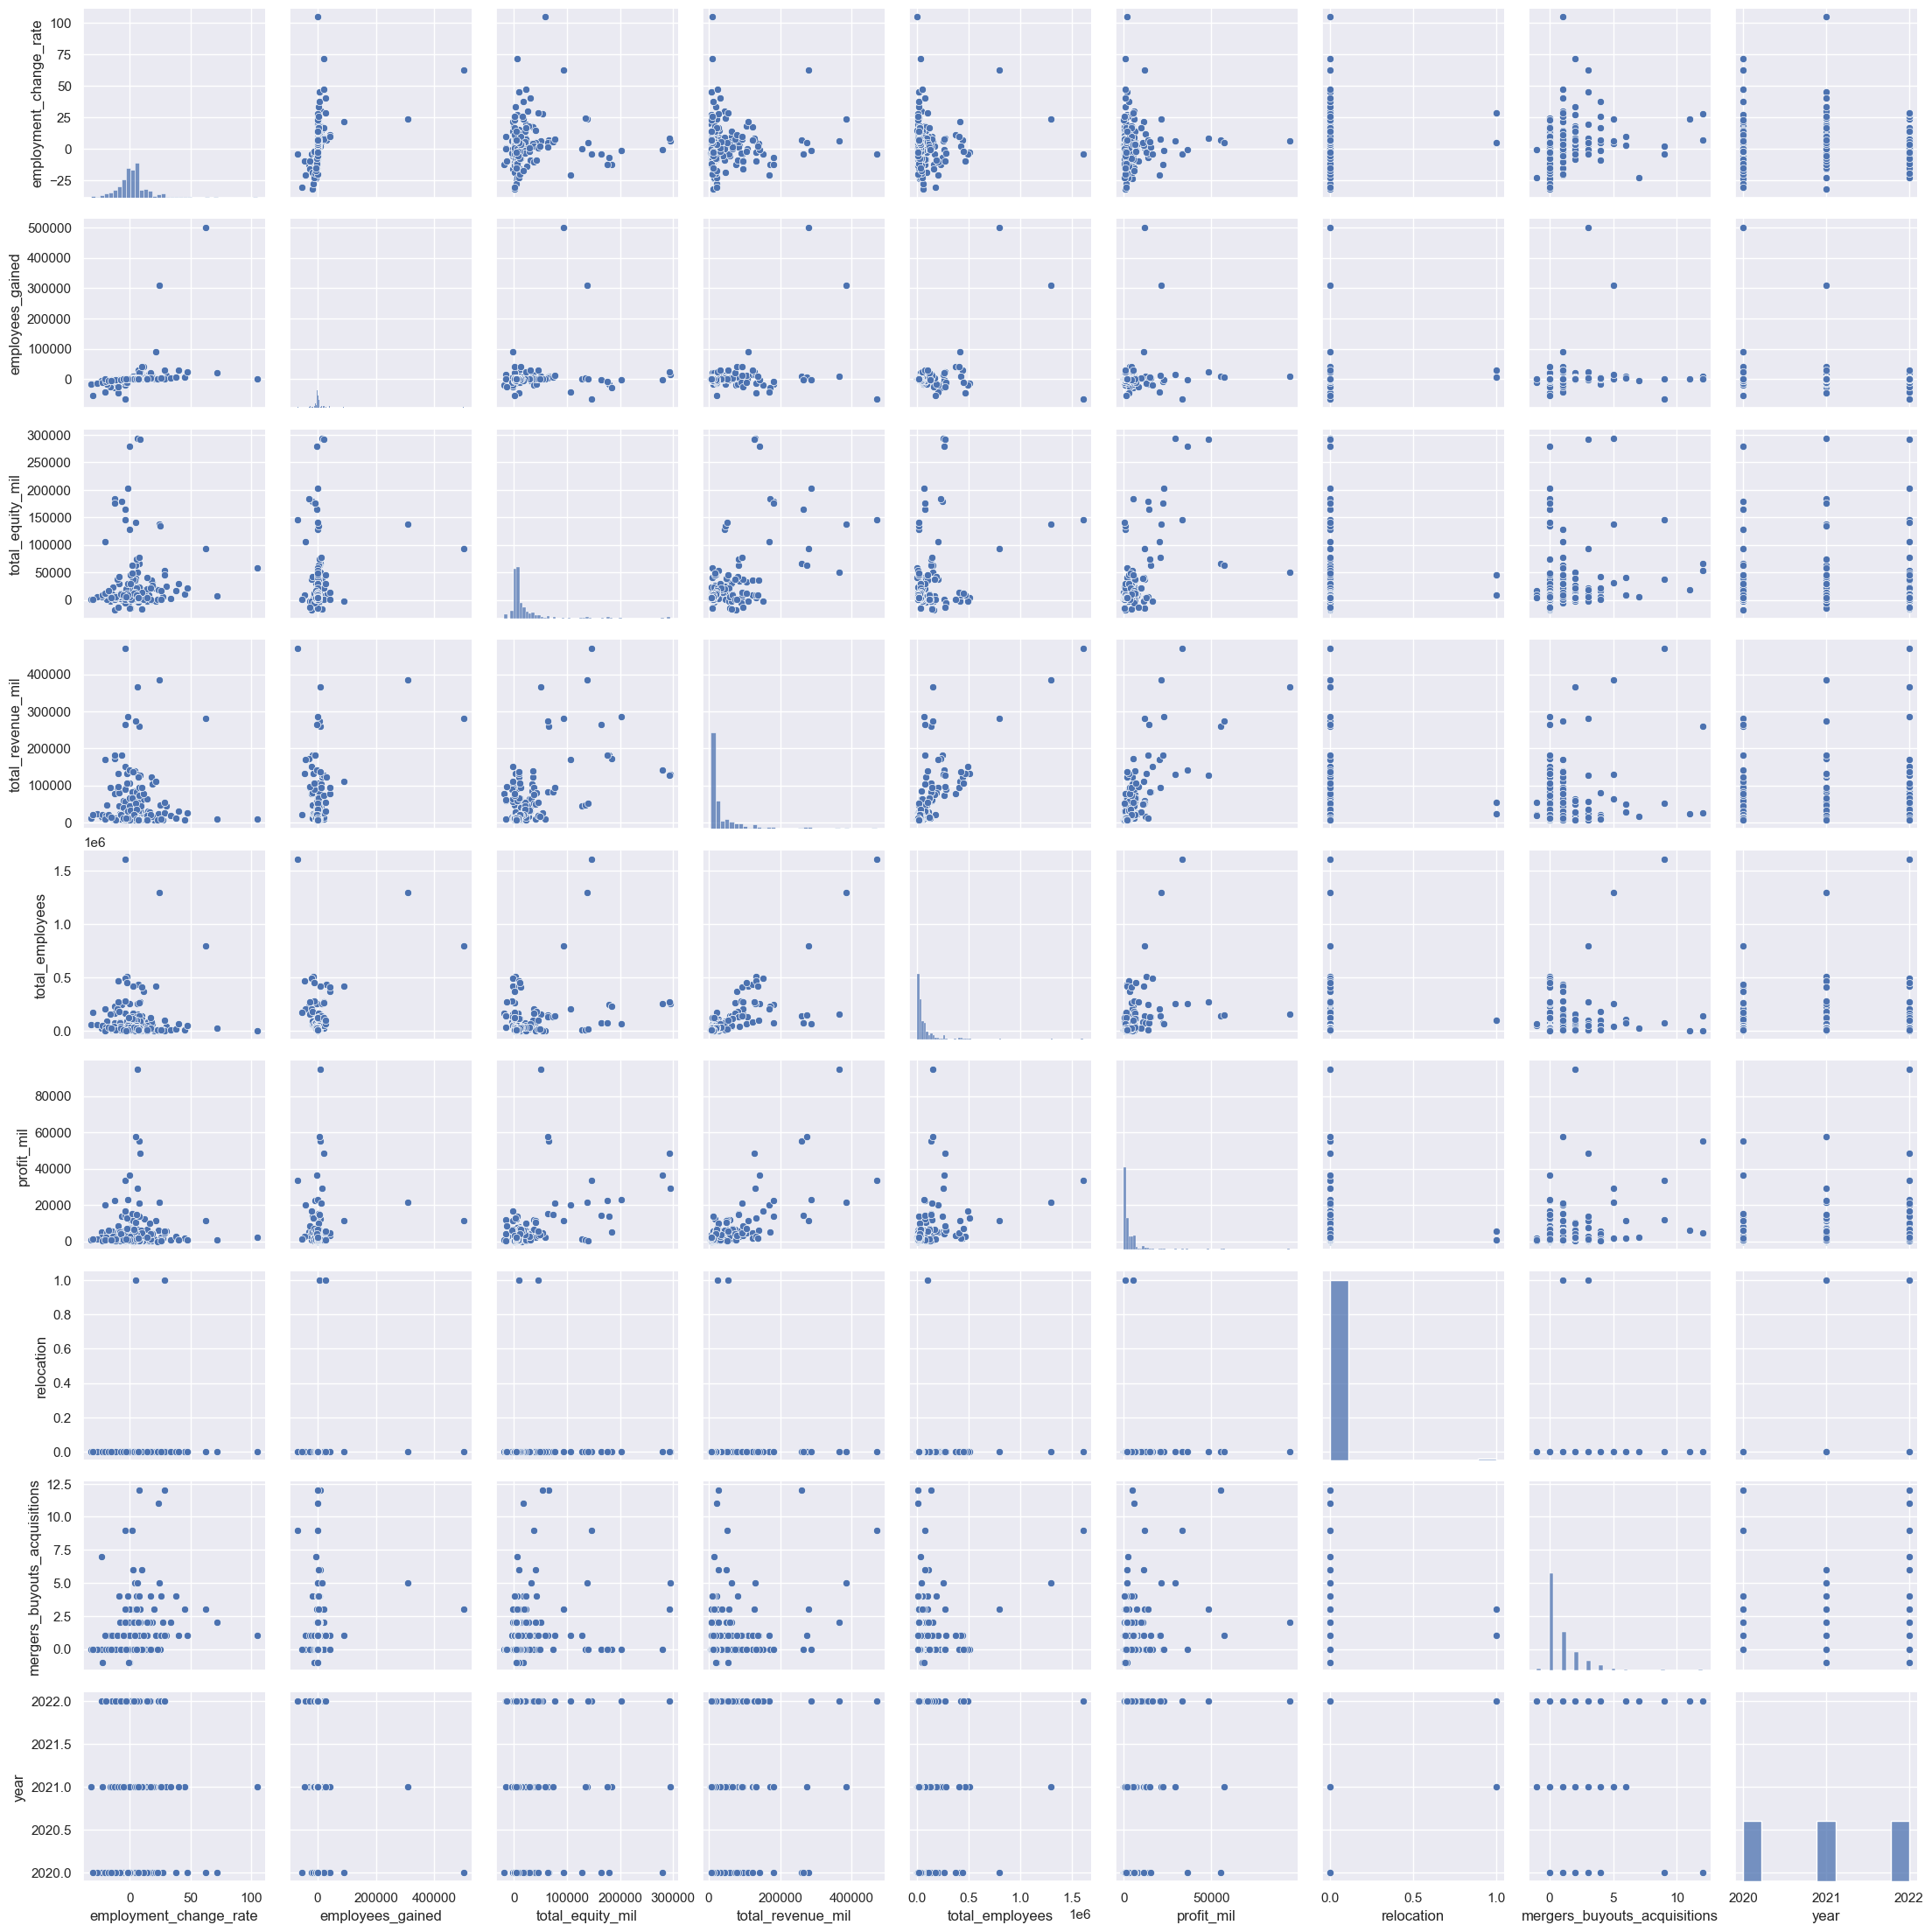

In [1029]:
sns.pairplot(df_clean)
plt.show()

In [1030]:
df_2020["employment_change_rate"].mean()

1.4802105263157899

In [1031]:
df_2021["employment_change_rate"].mean()

5.18075

In [1032]:
df_2022["employment_change_rate"].mean()

3.640881578947369

In [1033]:
df_clean["industry"].unique()

array(['Utilities: Gas and Electric', 'Metals',
       'Insurance: Property and Casualty (Stock)',
       'Internet Services and Retailing', 'Real Estate',
       'Pharmaceuticals', 'Computers, Office Equipment',
       'Food Production', 'Wholesalers: Electronics and Office Equipment',
       'Telecommunications', 'Diversified Outsourcing Services',
       'Specialty Retailers: Other', 'General Merchandisers',
       'Diversified Financials', 'Aerospace & Defense',
       'Motor Vehicles & Parts', 'Transportation and Logistics',
       'Network and Other Communications Equipment', 'Beverages',
       'Health Care: Medical Facilities', 'Petroleum Refining',
       'Airlines', 'Chemicals', 'Health Care: Insurance and Managed Care',
       'Insurance: Property and Casualty (Mutual)',
       'Specialty Retailers: Apparel', 'Industrial Machinery',
       'Oil and Gas Equipment, Services', 'Packaging, Containers',
       'Advertising, Marketing', 'Computer Software',
       'Construction an

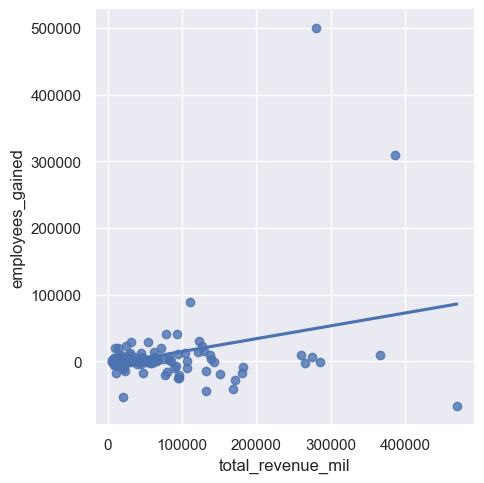

In [1034]:
sns.lmplot(x='total_revenue_mil', y='employees_gained', data=df_clean, ci=None)

plt.show()

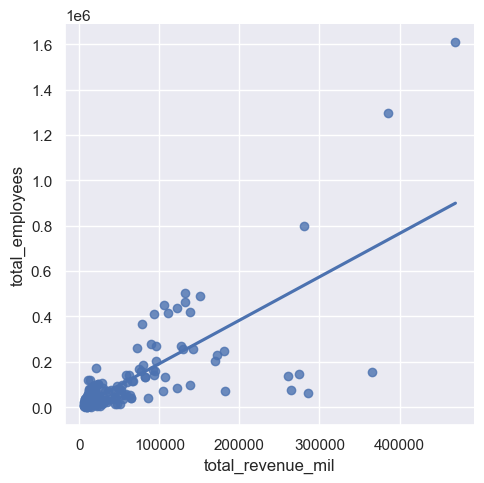

In [1035]:
sns.lmplot(x='total_revenue_mil', y='total_employees', data=df_clean, ci=None)

plt.show()

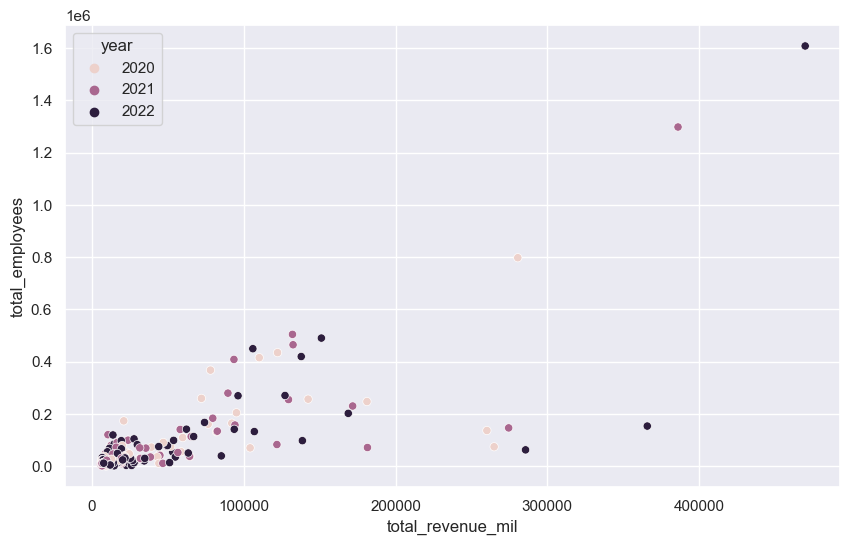

In [1036]:
sns.scatterplot(x='total_revenue_mil', y='total_employees', hue='year', data=df_clean)
plt.show()

In [1037]:
df_anti_amazon=df_clean[df_clean['company']!="BorgWarner"]
df_anti_amazon

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.0,11141,8450,409,0,0,2022,Energy
4,-6.522,Alcoa,PA,Metals,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
5,-5.426,Alcoa,PA,Metals,-700.0,6284.0,9286,12900,170,0,0,2021,Materials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-5.685,Vistra,TX,Energy,-305.0,8292.0,11443,5365,636,0,1,2021,Energy
298,-2.964,Vistra,TX,Energy,-150.0,4918.0,12077,5060,1274,0,0,2022,Energy
300,6.604,Zoetis,NJ,Pharmaceuticals,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,Zoetis,NJ,Pharmaceuticals,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care


In [1038]:
df_anti_amazon['employment_change_rate'].mean()

3.1354177777777776

In [1039]:
df_clean['employment_change_rate'].mean()

3.433947368421052

In [1040]:
df_sector_counts = df_clean['sector'].value_counts()
df_sector_counts

Financials                       36
Technology                       33
Energy                           30
Retailing                        30
Health Care                      18
Materials                        12
Transportation                    9
Food, Beverages & Tobacco         9
Business Services                 9
Chemicals                         9
Industrials                       6
Telecommunications                6
Motor Vehicles & Parts            6
Aerospace & Defense               6
Wholesalers                       3
Food & Drug Stores                3
Hotels, Restaurants & Leisure     3
Name: sector, dtype: int64

In [1041]:
df_sector_percentage=df_clean['sector'].value_counts(normalize=True)
df_sector_percentage

Financials                       0.157895
Technology                       0.144737
Energy                           0.131579
Retailing                        0.131579
Health Care                      0.078947
Materials                        0.052632
Transportation                   0.039474
Food, Beverages & Tobacco        0.039474
Business Services                0.039474
Chemicals                        0.039474
Industrials                      0.026316
Telecommunications               0.026316
Motor Vehicles & Parts           0.026316
Aerospace & Defense              0.026316
Wholesalers                      0.013158
Food & Drug Stores               0.013158
Hotels, Restaurants & Leisure    0.013158
Name: sector, dtype: float64

In [1042]:
df_chemicals=df_clean[df_clean['sector']=="Energy"]
df_chemicals

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.000,10189,8000,303,0,0,2020,Energy
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.000,9660,8162,46,0,3,2021,Energy
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.000,11141,8450,409,0,0,2022,Energy
96,-4.721,Delek US Holdings,TN,Petroleum Refining,-175.0,1125.100,9298,3707,311,0,0,2020,Energy
97,-6.229,Delek US Holdings,TN,Petroleum Refining,-220.0,1014.000,7302,3532,608,0,0,2021,Energy
98,13.104,Delek US Holdings,TN,Petroleum Refining,434.0,1069.500,10648,3312,204,0,0,2022,Energy
120,-1.724,Entergy,LA,Utilities: Gas and Electric,-235.0,10961.142,10879,13635,1241,0,0,2020,Energy
121,-7.694,Entergy,LA,Utilities: Gas and Electric,-1031.0,11705.394,10114,13400,1388,0,0,2021,Energy
122,-5.352,Entergy,LA,Utilities: Gas and Electric,-662.0,13064.892,11743,12369,1119,0,0,2022,Energy
128,-3.872,Exxon Mobil,TX,Petroleum Refining,-2900.0,164130.000,264938,74900,14340,0,0,2020,Energy


In [1043]:
df_chemicals['employment_change_rate'].mean()

-2.763966666666667

In [1044]:
df['sector'].value_counts(normalize=True)

Financials                       0.157895
Technology                       0.144737
Energy                           0.131579
Retailing                        0.131579
Health Care                      0.078947
Materials                        0.052632
Transportation                   0.039474
Food, Beverages & Tobacco        0.039474
Business Services                0.039474
Chemicals                        0.039474
Industrials                      0.026316
Telecommunications               0.026316
Motor Vehicles & Parts           0.026316
Aerospace & Defense              0.026316
Wholesalers                      0.013158
Food & Drug Stores               0.013158
Hotels, Restaurants & Leisure    0.013158
Name: sector, dtype: float64

In [1045]:
df['sector'].value_counts()

Financials                       36
Technology                       33
Energy                           30
Retailing                        30
Health Care                      18
Materials                        12
Transportation                    9
Food, Beverages & Tobacco         9
Business Services                 9
Chemicals                         9
Industrials                       6
Telecommunications                6
Motor Vehicles & Parts            6
Aerospace & Defense               6
Wholesalers                       3
Food & Drug Stores                3
Hotels, Restaurants & Leisure     3
Name: sector, dtype: int64

Text(0.5, 0, 'Average Employment Change Rate by Industry Sector')

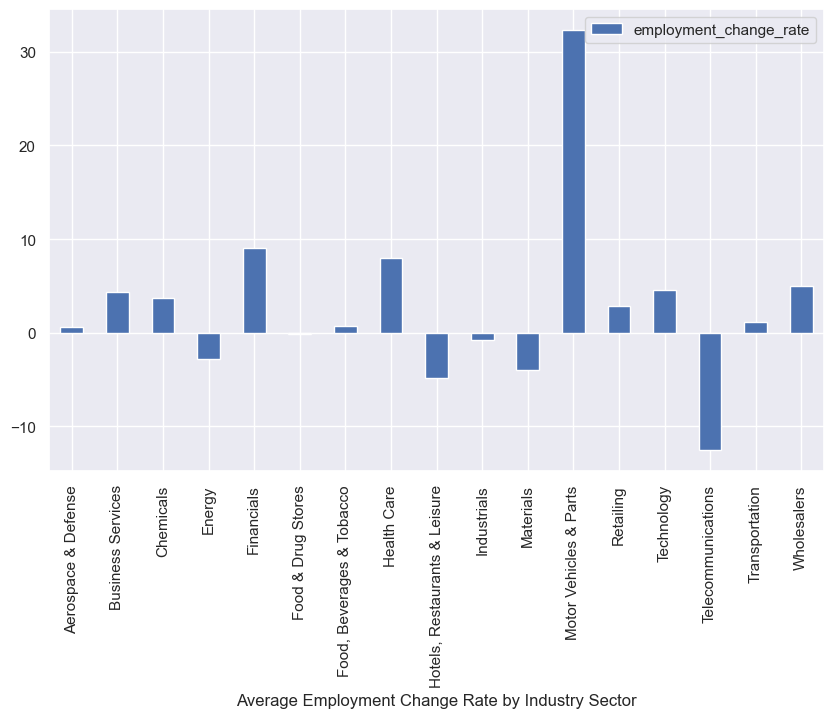

In [1046]:
df_clean[[ 'employment_change_rate','sector']].groupby(['sector']).mean().plot.bar()
plt.xlabel("Average Employment Change Rate by Industry Sector")

In [1047]:
df_clean[['sector', 'employment_change_rate']].groupby(['sector']).mean()


,employment_change_rate
sector,
Aerospace & Defense,0.580167
Business Services,4.392111
Chemicals,3.683556
Energy,-2.763967
Financials,9.038778
Food & Drug Stores,-0.133000
"Food, Beverages & Tobacco",0.770444
Health Care,7.955222
"Hotels, Restaurants & Leisure",-4.873000


Text(0.5, 1.0, 'Average Employment Change Rate by Industry Sector')

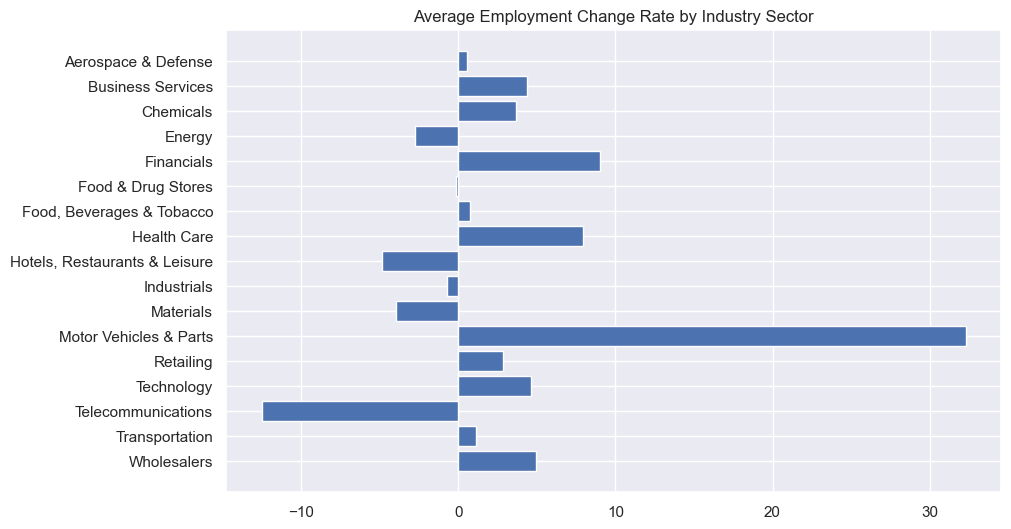

In [1048]:
import numpy as np

sector=('Aerospace & Defense','Business Services','Chemicals','Energy','Financials','Food & Drug Stores', 'Food, Beverages & Tobacco','Health Care','Hotels, Restaurants & Leisure','Industrials','Materials','Motor Vehicles & Parts','Retailing','Technology','Telecommunications','Transportation','Wholesalers')
sector=list(reversed(sector))
rate=[0.580167,4.392111,3.683556,-2.763967,9.038778,-0.133000,0.770444,7.955222,-4.873000,-0.742500,-3.970417,32.321000,2.841233,4.606848,-12.522000,1.148778,4.965000]
rate.reverse()
y_pos=np.arange(len(sector))
plt.barh(y_pos,rate)
plt.yticks(y_pos,sector)
plt.title("Average Employment Change Rate by Industry Sector")

Text(0.5, 0, 'Average Employment Change Rate by Industry Sector in 2020')

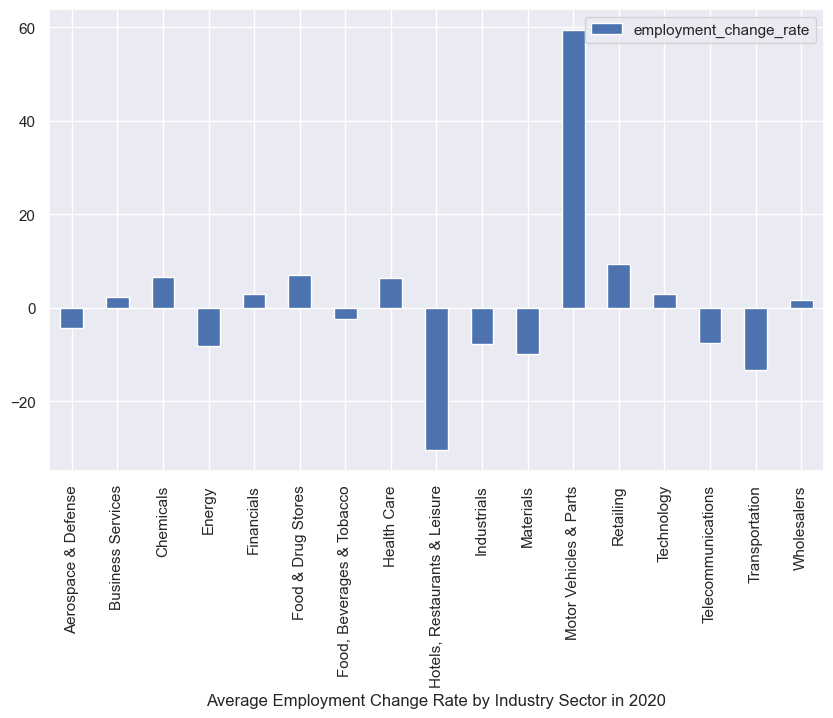

In [1049]:
df_2020[['sector', 'employment_change_rate']].groupby(['sector']).mean().plot.bar()
plt.xlabel("Average Employment Change Rate by Industry Sector in 2020")


In [1050]:
df_2020[['sector', 'employment_change_rate']].groupby(['sector']).mean()

,employment_change_rate
sector,
Aerospace & Defense,-4.420500
Business Services,2.224333
Chemicals,6.471333
Energy,-8.270400
Financials,2.941917
Food & Drug Stores,6.897000
"Food, Beverages & Tobacco",-2.518000
Health Care,6.399500
"Hotels, Restaurants & Leisure",-30.460000


Text(0.5, 1.0, 'Average Employment Change Rate by Industry Sector in 2020')

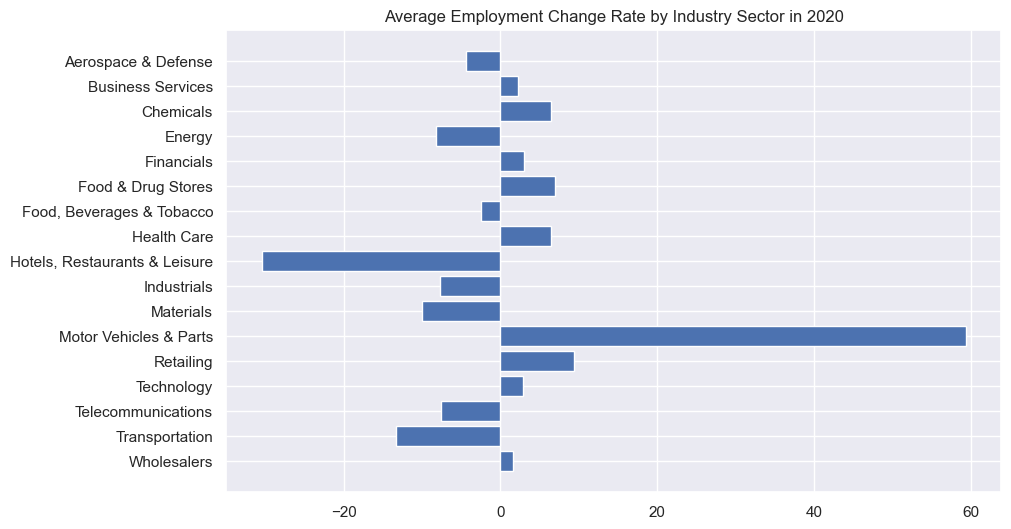

In [1051]:
sector=('Aerospace & Defense','Business Services','Chemicals','Energy','Financials','Food & Drug Stores', 'Food, Beverages & Tobacco','Health Care','Hotels, Restaurants & Leisure','Industrials','Materials','Motor Vehicles & Parts','Retailing','Technology','Telecommunications','Transportation','Wholesalers')
sector=list(reversed(sector))
rate=[-4.420500,2.224333,6.471333,-8.270400,2.941917,6.897000,-2.518000,6.399500,-30.460000,-7.745000,-9.994750,59.370000,9.423800,2.836182,-7.556000,-13.259333,1.554000]
rate.reverse()
y_pos=np.arange(len(sector))
plt.barh(y_pos,rate)
plt.yticks(y_pos,sector)
plt.title("Average Employment Change Rate by Industry Sector in 2020")

Text(0.5, 0, 'Average Employment Change Rate by Industry Sector in 2021')

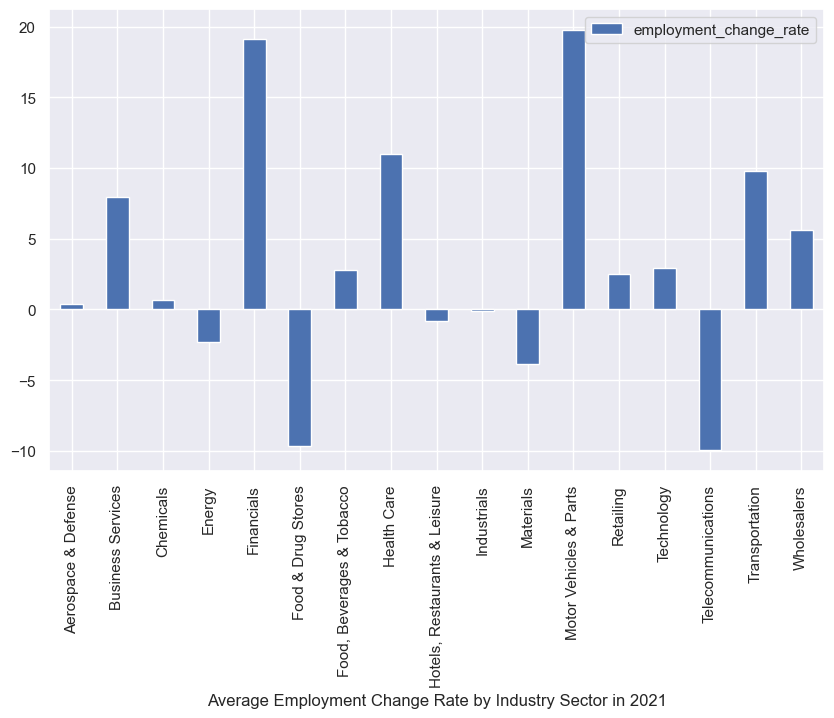

In [1052]:
df_2021[['sector', 'employment_change_rate']].groupby(['sector']).mean().plot.bar()
plt.xlabel("Average Employment Change Rate by Industry Sector in 2021")


In [1053]:
df_2021[['sector', 'employment_change_rate']].groupby(['sector']).mean()

,employment_change_rate
sector,
Aerospace & Defense,0.354500
Business Services,7.971000
Chemicals,0.664000
Energy,-2.294600
Financials,19.130917
Food & Drug Stores,-9.677000
"Food, Beverages & Tobacco",2.797667
Health Care,11.014167
"Hotels, Restaurants & Leisure",-0.826000


Text(0.5, 1.0, 'Average Employment Change Rate by Industry Sector in 2021')

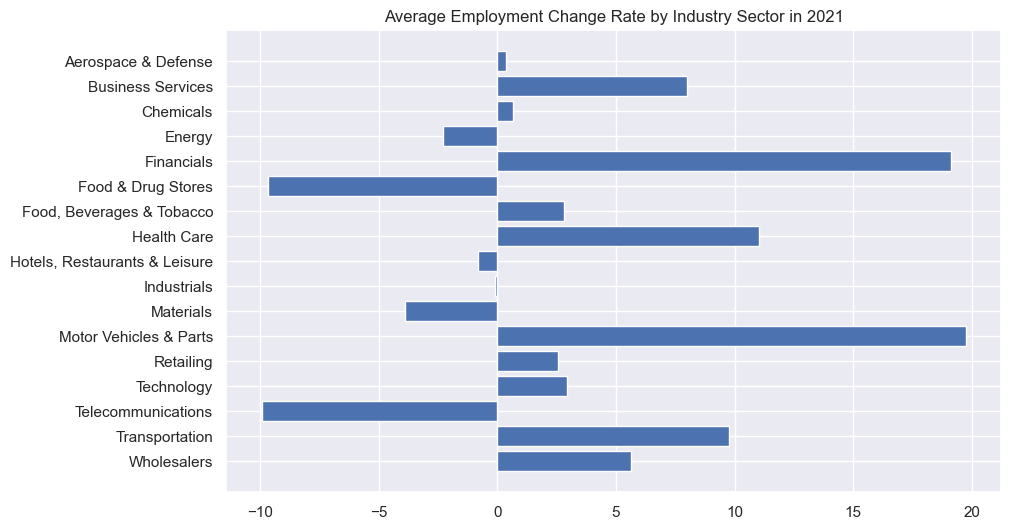

In [1054]:
sector=('Aerospace & Defense','Business Services','Chemicals','Energy','Financials','Food & Drug Stores', 'Food, Beverages & Tobacco','Health Care','Hotels, Restaurants & Leisure','Industrials','Materials','Motor Vehicles & Parts','Retailing','Technology','Telecommunications','Transportation','Wholesalers')
sector=list(reversed(sector))
rate=[0.354500,7.971000,0.664000,-2.294600,19.130917,-9.677000,2.797667,11.014167,-0.826000,-0.100000,-3.884250,19.760000,2.532800,2.946636,-9.947500,9.760667,5.612000]
rate.reverse()
y_pos=np.arange(len(sector))
plt.barh(y_pos,rate)
plt.yticks(y_pos,sector)
plt.title("Average Employment Change Rate by Industry Sector in 2021")

Text(0.5, 0, 'Average Employment Change Rate by Industry Sector in 2022')

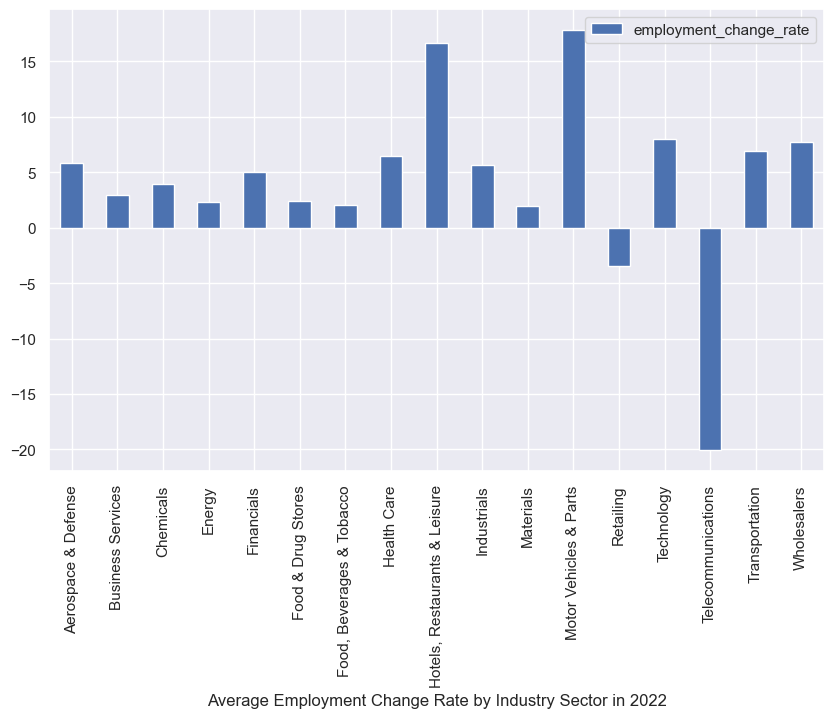

In [1055]:
df_2022[['sector', 'employment_change_rate']].groupby(['sector']).mean().plot.bar()
plt.xlabel("Average Employment Change Rate by Industry Sector in 2022")


In [1056]:
df_2022[['sector', 'employment_change_rate']].groupby(['sector']).mean()

,employment_change_rate
sector,
Aerospace & Defense,5.806500
Business Services,2.981000
Chemicals,3.915333
Energy,2.273100
Financials,5.043500
Food & Drug Stores,2.381000
"Food, Beverages & Tobacco",2.031667
Health Care,6.452000
"Hotels, Restaurants & Leisure",16.667000


Text(0.5, 1.0, 'Average Employment Change Rate by Industry Sector in 2022')

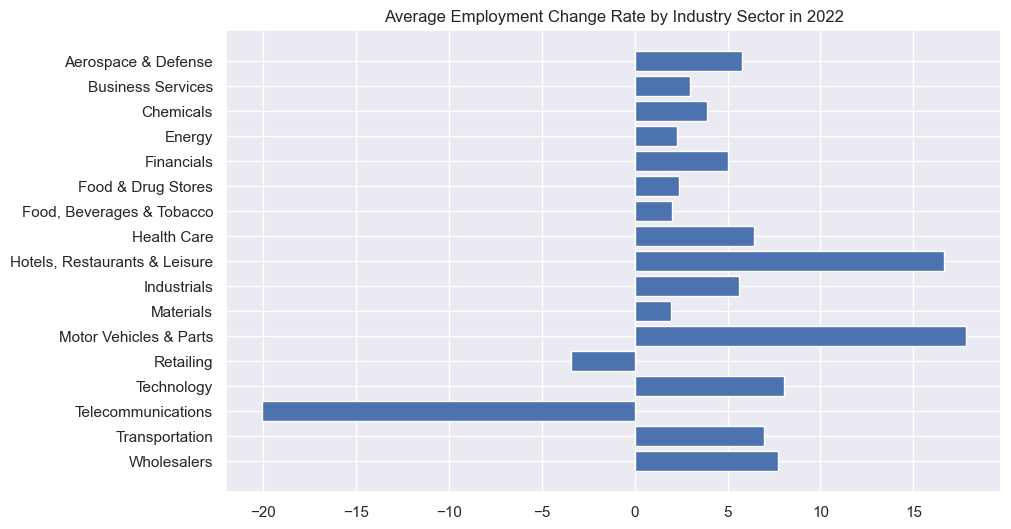

In [1057]:
sector=('Aerospace & Defense','Business Services','Chemicals','Energy','Financials','Food & Drug Stores', 'Food, Beverages & Tobacco','Health Care','Hotels, Restaurants & Leisure','Industrials','Materials','Motor Vehicles & Parts','Retailing','Technology','Telecommunications','Transportation','Wholesalers')
sector=list(reversed(sector))
rate=[5.806500,2.981000,3.915333,2.273100,5.043500,2.381000,2.031667,6.452000,16.667000,5.617500,1.967750,17.833000,-3.432900,8.037727,-20.062500,6.945000,7.729000]
rate.reverse()
y_pos=np.arange(len(sector))
plt.barh(y_pos,rate)
plt.yticks(y_pos,sector)
plt.title("Average Employment Change Rate by Industry Sector in 2022")

In [1058]:
df_clean.corr()

,employment_change_rate,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year
employment_change_rate,1.000000,0.405283,0.067458,0.024879,0.046134,0.017269,0.084684,0.246613,0.059036
employees_gained,0.405283,1.000000,0.146054,0.314641,0.413841,0.098862,0.029421,0.122623,-0.069542
total_equity_mil,0.067458,0.146054,1.000000,0.587351,0.333039,0.545167,0.009238,0.181236,0.011261
total_revenue_mil,0.024879,0.314641,0.587351,1.000000,0.759948,0.740371,-0.007170,0.243906,0.050255
total_employees,0.046134,0.413841,0.333039,0.759948,1.000000,0.366686,0.008645,0.228496,0.028439
profit_mil,0.017269,0.098862,0.545167,0.740371,0.366686,1.000000,-0.014857,0.286432,0.084128
relocation,0.084684,0.029421,0.009238,-0.007170,0.008645,-0.014857,1.000000,0.044240,0.057607
mergers_buyouts_acquisitions,0.246613,0.122623,0.181236,0.243906,0.228496,0.286432,0.044240,1.000000,0.038398
year,0.059036,-0.069542,0.011261,0.050255,0.028439,0.084128,0.057607,0.038398,1.000000


In [1059]:
df_clean

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.0,11141,8450,409,0,0,2022,Energy
4,-6.522,Alcoa,PA,Metals,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
5,-5.426,Alcoa,PA,Metals,-700.0,6284.0,9286,12900,170,0,0,2021,Materials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-5.685,Vistra,TX,Energy,-305.0,8292.0,11443,5365,636,0,1,2021,Energy
298,-2.964,Vistra,TX,Energy,-150.0,4918.0,12077,5060,1274,0,0,2022,Energy
300,6.604,Zoetis,NJ,Pharmaceuticals,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,Zoetis,NJ,Pharmaceuticals,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care


In [1060]:
df_coef=pd.read_csv('coef.csv')
df_coef

,employment_change_rate,location,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,VA,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,VA,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,VA,650.0,4504.0,11141,8450,409,0,0,2022,Energy
3,0.000,VA,NaN,NaN,12617,9100,546,0,-1,2023,Energy
4,-6.522,PA,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
...,...,...,...,...,...,...,...,...,...,...,...
299,0.000,TX,NaN,NaN,13728,4910,1227,0,1,2023,Energy
300,6.604,NJ,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,NJ,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care
302,14.050,NJ,1700.0,4403.0,7776,12100,2037,0,2,2022,Health Care


In [1061]:
df_coef=df_coef.dropna()
df_coef

,employment_change_rate,location,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,VA,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,VA,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,VA,650.0,4504.0,11141,8450,409,0,0,2022,Energy
4,-6.522,PA,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
5,-5.426,PA,-700.0,6284.0,9286,12900,170,0,0,2021,Materials
...,...,...,...,...,...,...,...,...,...,...,...
297,-5.685,TX,-305.0,8292.0,11443,5365,636,0,1,2021,Energy
298,-2.964,TX,-150.0,4918.0,12077,5060,1274,0,0,2022,Energy
300,6.604,NJ,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,NJ,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care


In [1062]:
df_coef.columns

Index(['employment_change_rate', 'location', 'employees_gained',
       'total_equity_mil', 'total_revenue_mil', 'total_employees',
       'profit_mil', 'relocation', 'mergers_buyouts_acquisitions', 'year',
       'sector'],
      dtype='object')

In [1063]:
formula = 'employment_change_rate ~ %s'%(" + ".join(df_coef.columns.values[1:]))
formula

'employment_change_rate ~ location + employees_gained + total_equity_mil + total_revenue_mil + total_employees + profit_mil + relocation + mergers_buyouts_acquisitions + year + sector'

In [1064]:
lin_reg = smf.ols(formula, data=df_coef).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     employment_change_rate   R-squared:                       0.441
Model:                                OLS   Adj. R-squared:                  0.295
Method:                     Least Squares   F-statistic:                     3.020
Date:                    Thu, 30 Nov 2023   Prob (F-statistic):           7.13e-08
Time:                            01:41:29   Log-Likelihood:                -873.79
No. Observations:                     228   AIC:                             1844.
Df Residuals:                         180   BIC:                             2008.
Df Model:                              47                                         
Covariance Type:                nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                               -3612.2808   2089.924     -1.728      0.086   -7736.184     511.622
location[T.CO]                             -7.3491      6.249     -1.176      0.241     -19.680       4.982
location[T.CT]                            -12.1504      7.798     -1.558      0.121     -27.537       3.236
location[T.FL]                             -6.8079      6.210     -1.096      0.274     -19.062       5.446
location[T.GA]                             16.5942     12.982      1.278      0.203      -9.022      42.211
location[T.IL]                              0.6777      5.767      0.118      0.907     -10.702      12.057
location[T.IN]                              3.6790      9.126      0.403      0.687     -14.328      21.686
location[T.KS]                              0.3169     10.071      0.031      0.975     -19.555      20.189
location[T.LA]                             -9.1549      7.461     -1.227      0.221     -23.877       5.567
location[T.MA]                              0.9247      5.967      0.155      0.877     -10.850      12.699
location[T.MD]                              0.0012     11.783      0.000      1.000     -23.249      23.251
location[T.MI]                             -9.6765      7.993     -1.211      0.228     -25.449       6.096
location[T.MN]                             14.6766     12.034      1.220      0.224      -9.070      38.423
location[T.MO]                             -2.8099     10.515     -0.267      0.790     -23.558      17.938
location[T.NC]                              0.4957      5.619      0.088      0.930     -10.592      11.583
location[T.NE]                              8.3002     14.410      0.576      0.565     -20.134      36.734
location[T.NJ]                             -7.4666      4.915     -1.519      0.130     -17.164       2.231
location[T.NY]                              2.7779      4.638      0.599      0.550      -6.374      11.930
location[T.OH]                              4.7389      7.078      0.670      0.504      -9.227      18.705
location[T.PA]                             -6.1744      4.930     -1.252      0.212     -15.903       3.555
location[T.TN]                             -0.5991      5.533     -0.108      0.914     -11.516      10.318
location[T.TX]                             -6.5583      5.187     -1.264      0.208     -16.793       3.677
location[T.VA]                             -2.9086      5.970     -0.487      0.627     -14.688       8.871
location[T.WA]                             26.5506     36.289      0.732      0.465     -45.055      98.157
location[T.WI]                             -4.7026      8.677     -0.542      0.589     -21.825      12.419
sector[T.Busine

In [1065]:
lin_reg.params

Intercept                                 -3612.280815
location[T.CO]                               -7.349126
location[T.CT]                              -12.150361
location[T.FL]                               -6.807911
location[T.GA]                               16.594187
location[T.IL]                                0.677663
location[T.IN]                                3.679035
location[T.KS]                                0.316927
location[T.LA]                               -9.154920
location[T.MA]                                0.924693
location[T.MD]                                0.001210
location[T.MI]                               -9.676496
location[T.MN]                               14.676649
location[T.MO]                               -2.809863
location[T.NC]                                0.495681
location[T.NE]                                8.300192
location[T.NJ]                               -7.466617
location[T.NY]                                2.777865
location[T

In [1066]:
lin_reg.conf_int()

,0,1
Intercept,-7736.183841,511.622210
location[T.CO],-19.679762,4.981511
location[T.CT],-27.537091,3.236369
location[T.FL],-19.061559,5.445738
location[T.GA],-9.022298,42.210671
location[T.IL],-10.701884,12.057210
location[T.IN],-14.327799,21.685869
location[T.KS],-19.555222,20.189076
location[T.LA],-23.876710,5.566871
location[T.MA],-10.849664,12.699050


In [1067]:
err_series = lin_reg.params - lin_reg.conf_int()[0]
err_series

Intercept                                  4123.903025
location[T.CO]                               12.330637
location[T.CT]                               15.386730
location[T.FL]                               12.253649
location[T.GA]                               25.616484
location[T.IL]                               11.379547
location[T.IN]                               18.006834
location[T.KS]                               19.872149
location[T.LA]                               14.721791
location[T.MA]                               11.774357
location[T.MD]                               23.250105
location[T.MI]                               15.772713
location[T.MN]                               23.746343
location[T.MO]                               20.747796
location[T.NC]                               11.087300
location[T.NE]                               28.433816
location[T.NJ]                                9.697812
location[T.NY]                                9.151854
location[T

In [1068]:
coef_df = pd.DataFrame({'coef': lin_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
coef_df

,coef,err,varname
0,-7.349126,12.330637,location[T.CO]
1,-12.150361,15.386730,location[T.CT]
2,-6.807911,12.253649,location[T.FL]
3,16.594187,25.616484,location[T.GA]
4,0.677663,11.379547,location[T.IL]
5,3.679035,18.006834,location[T.IN]
6,0.316927,19.872149,location[T.KS]
7,-9.154920,14.721791,location[T.LA]
8,0.924693,11.774357,location[T.MA]
9,0.001210,23.250105,location[T.MD]


ValueError: The number of FixedLocator locations (48), usually from a call to set_ticks, does not match the number of ticklabels (10).

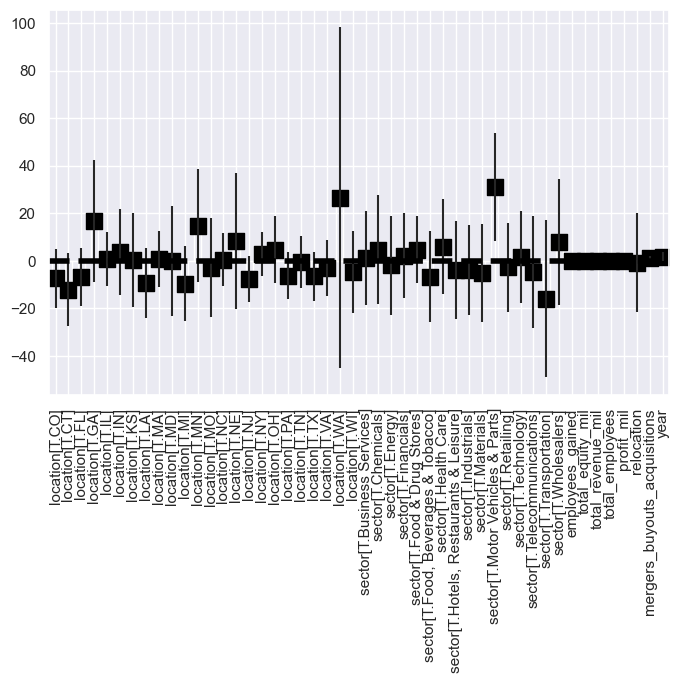

In [1069]:
fig, ax = plt.subplots(figsize=(8, 5))
coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(coef_df.shape[0]), 
           marker='s', s=120, 
           y=coef_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['location', 'employees_gained',
       'total_equity_mil', 'total_revenue_mil', 'total_employees',
       'profit_mil', 'relocation', 'mergers_buyouts_acquisitions', 'year',
       'sector'], 
                       rotation=0, fontsize=16)

In [1070]:
df_clean

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.0,11141,8450,409,0,0,2022,Energy
4,-6.522,Alcoa,PA,Metals,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
5,-5.426,Alcoa,PA,Metals,-700.0,6284.0,9286,12900,170,0,0,2021,Materials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-5.685,Vistra,TX,Energy,-305.0,8292.0,11443,5365,636,0,1,2021,Energy
298,-2.964,Vistra,TX,Energy,-150.0,4918.0,12077,5060,1274,0,0,2022,Energy
300,6.604,Zoetis,NJ,Pharmaceuticals,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,Zoetis,NJ,Pharmaceuticals,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care


In [1071]:
df_sector=pd.read_csv('coef_sector.csv')
df_sector=df_sector.dropna()
df_sector

,employment_change_rate,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,650.0,4504.0,11141,8450,409,0,0,2022,Energy
4,-6.522,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
5,-5.426,-700.0,6284.0,9286,12900,170,0,0,2021,Materials
...,...,...,...,...,...,...,...,...,...,...
297,-5.685,-305.0,8292.0,11443,5365,636,0,1,2021,Energy
298,-2.964,-150.0,4918.0,12077,5060,1274,0,0,2022,Energy
300,6.604,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care


In [1072]:
formula = 'employment_change_rate ~ %s'%(" + ".join(df_sector.columns.values[1:]))
formula

'employment_change_rate ~ employees_gained + total_equity_mil + total_revenue_mil + total_employees + profit_mil + relocation + mergers_buyouts_acquisitions + year + sector'

In [1073]:
lin_reg = smf.ols(formula, data=df_sector).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     employment_change_rate   R-squared:                       0.386
Model:                                OLS   Adj. R-squared:                  0.313
Method:                     Least Squares   F-statistic:                     5.319
Date:                    Thu, 30 Nov 2023   Prob (F-statistic):           5.89e-12
Time:                            01:41:30   Log-Likelihood:                -884.45
No. Observations:                     228   AIC:                             1819.
Df Residuals:                         203   BIC:                             1905.
Df Model:                              24                                         
Covariance Type:                nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                               -3462.9851   2055.644     -1.685      0.094   -7516.138     590.167
sector[T.Business Services]                 0.9374      6.656      0.141      0.888     -12.187      14.062
sector[T.Chemicals]                         0.0121      6.640      0.002      0.999     -13.079      13.104
sector[T.Energy]                           -5.8661      5.726     -1.024      0.307     -17.157       5.425
sector[T.Financials]                        3.3800      5.856      0.577      0.564      -8.166      14.926
sector[T.Food & Drug Stores]                3.2559      9.094      0.358      0.721     -14.675      21.187
sector[T.Food, Beverages & Tobacco]        -3.6931      6.688     -0.552      0.581     -16.880       9.494
sector[T.Health Care]                       3.8726      5.954      0.650      0.516      -7.868      15.613
sector[T.Hotels, Restaurants & Leisure]    -3.9373      8.885     -0.443      0.658     -21.457      13.582
sector[T.Industrials]                      -3.2690      7.253     -0.451      0.653     -17.570      11.032
sector[T.Materials]                        -6.6137      6.307     -1.049      0.296     -19.050       5.822
sector[T.Motor Vehicles & Parts]           26.5541      7.485      3.548      0.000      11.796      41.313
sector[T.Retailing]                        -1.3258      5.671     -0.234      0.815     -12.507       9.856
sector[T.Technology]                        0.7408      5.636      0.131      0.896     -10.371      11.853
sector[T.Telecommunications]              -12.0881      7.475     -1.617      0.107     -26.826       2.650
sector[T.Transportation]                   -1.3109      6.618     -0.198      0.843     -14.359      11.737
sector[T.Wholesalers]                       2.2941      8.834      0.260      0.795     -15.124      19.712
employees_gained                            0.0002    2.3e-05      6.849      0.000       0.000       0.000
total_equity_mil                         2.582e-05    2.6e-05      0.993      0.322   -2.55e-05    7.71e-05
total_revenue_mil                       -6.867e-06   3.32e-05     -0.207      0.836   -7.23e-05    5.86e-05
total_employees                         -1.378e-05   1.01e-05     -1.358      0.176   -3.38e-05    6.22e-06
profit_mil                              -7.076e-05      0.000     -0.467      0.641      -0.000       0.000
relocation                                 -5.8289      9.262     -0.629      0.530     -24.091      12.433
mergers_buyouts_acquisitions                1.2504      0.480      2.607      0.010       0.305       2.196
year                                        1.7149      1.017      1.686      0.093      -0.291       3.721
===============

In [1074]:
lin_reg.params

Intercept                                 -3462.985102
sector[T.Business Services]                   0.937429
sector[T.Chemicals]                           0.012121
sector[T.Energy]                             -5.866051
sector[T.Financials]                          3.380003
sector[T.Food & Drug Stores]                  3.255929
sector[T.Food, Beverages & Tobacco]          -3.693094
sector[T.Health Care]                         3.872594
sector[T.Hotels, Restaurants & Leisure]      -3.937282
sector[T.Industrials]                        -3.268989
sector[T.Materials]                          -6.613720
sector[T.Motor Vehicles & Parts]             26.554110
sector[T.Retailing]                          -1.325842
sector[T.Technology]                          0.740755
sector[T.Telecommunications]                -12.088095
sector[T.Transportation]                     -1.310946
sector[T.Wholesalers]                         2.294122
employees_gained                              0.000158
total_equi

In [1075]:
err_series = lin_reg.params - lin_reg.conf_int()[0]
err_series

Intercept                                  4053.152442
sector[T.Business Services]                  13.124162
sector[T.Chemicals]                          13.091439
sector[T.Energy]                             11.290960
sector[T.Financials]                         11.545940
sector[T.Food & Drug Stores]                 17.930885
sector[T.Food, Beverages & Tobacco]          13.187171
sector[T.Health Care]                        11.740273
sector[T.Hotels, Restaurants & Leisure]      17.519498
sector[T.Industrials]                        14.300893
sector[T.Materials]                          12.435808
sector[T.Motor Vehicles & Parts]             14.758498
sector[T.Retailing]                          11.181398
sector[T.Technology]                         11.111847
sector[T.Telecommunications]                 14.738064
sector[T.Transportation]                     13.047986
sector[T.Wholesalers]                        17.418342
employees_gained                              0.000045
total_equi

In [1076]:
sector_df = pd.DataFrame({'coef': lin_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
sector_df

,coef,err,varname
0,0.937429,13.124162,sector[T.Business Services]
1,0.012121,13.091439,sector[T.Chemicals]
2,-5.866051,11.290960,sector[T.Energy]
3,3.380003,11.545940,sector[T.Financials]
4,3.255929,17.930885,sector[T.Food & Drug Stores]
5,-3.693094,13.187171,"sector[T.Food, Beverages & Tobacco]"
6,3.872594,11.740273,sector[T.Health Care]
7,-3.937282,17.519498,"sector[T.Hotels, Restaurants & Leisure]"
8,-3.268989,14.300893,sector[T.Industrials]
9,-6.613720,12.435808,sector[T.Materials]


ValueError: The number of FixedLocator locations (24), usually from a call to set_ticks, does not match the number of ticklabels (9).

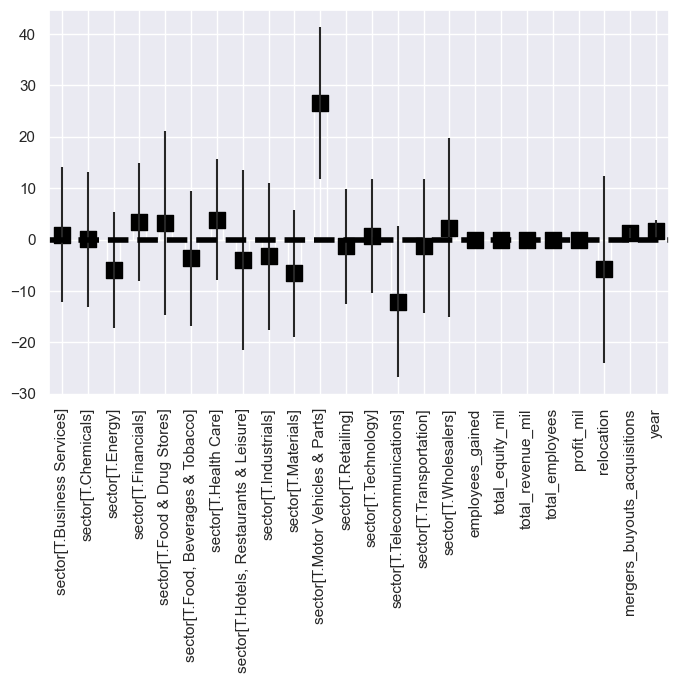

In [1077]:
fig, ax = plt.subplots(figsize=(8, 5))
sector_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(sector_df.shape[0]), 
           marker='s', s=120, 
           y=sector_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['employees_gained',
       'total_equity_mil', 'total_revenue_mil', 'total_employees',
       'profit_mil', 'relocation', 'mergers_buyouts_acquisitions', 'year',
       'sector'], 
                       rotation=0, fontsize=16)

In [ ]:
df_location=pd.read_csv('coef_location.csv')
df_location=df_location.dropna()
df_location

,employment_change_rate,location,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year
0,2.025,VA,162.0,4720.0,10189,8000,303,0,0,2020
1,3.529,VA,288.0,4567.0,9660,8162,46,0,3,2021
2,7.692,VA,650.0,4504.0,11141,8450,409,0,0,2022
4,-6.522,PA,-900.0,5016.0,10433,13800,1125,0,0,2020
5,-5.426,PA,-700.0,6284.0,9286,12900,170,0,0,2021
...,...,...,...,...,...,...,...,...,...,...
297,-5.685,TX,-305.0,8292.0,11443,5365,636,0,1,2021
298,-2.964,TX,-150.0,4918.0,12077,5060,1274,0,0,2022
300,6.604,NJ,700.0,3773.0,6260,10600,1500,0,2,2020
301,7.080,NJ,800.0,4544.0,6675,11300,1638,0,2,2021


In [ ]:
formula = 'employment_change_rate ~ %s'%(" + ".join(df_location.columns.values[1:]))
formula

'employment_change_rate ~ location + employees_gained + total_equity_mil + total_revenue_mil + total_employees + profit_mil + relocation + mergers_buyouts_acquisitions + year'

In [ ]:
lin_reg = smf.ols(formula, data=df_location).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     employment_change_rate   R-squared:                       0.353
Model:                                OLS   Adj. R-squared:                  0.247
Method:                     Least Squares   F-statistic:                     3.323
Date:                    Thu, 30 Nov 2023   Prob (F-statistic):           1.41e-07
Time:                            01:21:26   Log-Likelihood:                -890.44
No. Observations:                     228   AIC:                             1847.
Df Residuals:                         195   BIC:                             1960.
Df Model:                              32                                         
Covariance Type:                nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                    -3688.8363   2158.364     -1.709      0.089   -7945.571     567.898
location[T.CO]                  -6.6220      4.933     -1.342      0.181     -16.352       3.108
location[T.CT]                 -13.5460      7.847     -1.726      0.086     -29.022       1.930
location[T.FL]                  -9.7222      5.788     -1.680      0.095     -21.136       1.692
location[T.GA]                  -1.5432      6.753     -0.229      0.819     -14.862      11.776
location[T.IL]                  -4.8212      4.137     -1.165      0.245     -12.980       3.337
location[T.IN]                   5.8737      8.513      0.690      0.491     -10.915      22.662
location[T.KS]                  -9.1762      7.870     -1.166      0.245     -24.698       6.346
location[T.LA]                 -15.2226      5.831     -2.610      0.010     -26.723      -3.722
location[T.MA]                  -4.5336      4.936     -0.918      0.360     -14.269       5.202
location[T.MD]                  -6.9767      5.936     -1.175      0.241     -18.684       4.731
location[T.MI]                   4.6528      5.786      0.804      0.422      -6.758      16.063
location[T.MN]                  -2.5607      6.434     -0.398      0.691     -15.249      10.128
location[T.MO]                  -0.7897      7.886     -0.100      0.920     -16.343      14.763
location[T.NC]                  -5.6007      5.029     -1.114      0.267     -15.518       4.317
location[T.NE]                 -10.5171      7.865     -1.337      0.183     -26.028       4.994
location[T.NJ]                  -8.6141      4.396     -1.960      0.051     -17.283       0.055
location[T.NY]                  -0.4864      3.751     -0.130      0.897      -7.883       6.911
location[T.OH]                  -2.8668      9.978     -0.287      0.774     -22.546      16.812
location[T.PA]                 -10.2703      4.076     -2.520      0.013     -18.308      -2.233
location[T.TN]                  -7.3283      4.982     -1.471      0.143     -17.153       2.496
location[T.TX]                 -11.3416      4.200     -2.700      0.008     -19.625      -3.059
location[T.VA]                  -6.1379      5.777     -1.063      0.289     -17.531       5.255
location[T.WA]                 -17.2487     22.766     -0.758      0.450     -62.148      27.651
location[T.WI]                 -11.4151      7.945     -1.437      0.152     -27.085       4.255
employees_gained                 0.0002   3.35e-05      5.309      0.000       0.000       0.000
total_equity_mil              2.825e-05    2.8e-05      1.009      0.314    -2.7e-05    8.35e-05
total_revenue_mil            -2.034e-05   4.06e-05     -0.502      0.616      -0.000    5.96e-05
total_employees              -6.

In [ ]:
lin_reg.params

Intercept                      -3688.836345
location[T.CO]                    -6.622025
location[T.CT]                   -13.546030
location[T.FL]                    -9.722165
location[T.GA]                    -1.543221
location[T.IL]                    -4.821214
location[T.IN]                     5.873651
location[T.KS]                    -9.176214
location[T.LA]                   -15.222644
location[T.MA]                    -4.533623
location[T.MD]                    -6.976709
location[T.MI]                     4.652783
location[T.MN]                    -2.560722
location[T.MO]                    -0.789664
location[T.NC]                    -5.600681
location[T.NE]                   -10.517092
location[T.NJ]                    -8.614057
location[T.NY]                    -0.486369
location[T.OH]                    -2.866825
location[T.PA]                   -10.270334
location[T.TN]                    -7.328323
location[T.TX]                   -11.341635
location[T.VA]                  

In [ ]:
err_series = lin_reg.params - lin_reg.conf_int()[0]
err_series

Intercept                       4256.734272
location[T.CO]                     9.729697
location[T.CT]                    15.475607
location[T.FL]                    11.414142
location[T.GA]                    13.319171
location[T.IL]                     8.158634
location[T.IN]                    16.788829
location[T.KS]                    15.521893
location[T.LA]                    11.500557
location[T.MA]                     9.735126
location[T.MD]                    11.707719
location[T.MI]                    11.410620
location[T.MN]                    12.688532
location[T.MO]                    15.553103
location[T.NC]                     9.917530
location[T.NE]                    15.510868
location[T.NJ]                     8.669163
location[T.NY]                     7.397033
location[T.OH]                    19.678919
location[T.PA]                     8.037812
location[T.TN]                     9.824667
location[T.TX]                     8.283049
location[T.VA]                  

In [ ]:
location_df = pd.DataFrame({'coef': lin_reg.params.values[1:],
                        'err': err_series.values[1:],
                        'varname': err_series.index.values[1:]
                       })
location_df

,coef,err,varname
0,-6.622025,9.729697,location[T.CO]
1,-13.546030,15.475607,location[T.CT]
2,-9.722165,11.414142,location[T.FL]
3,-1.543221,13.319171,location[T.GA]
4,-4.821214,8.158634,location[T.IL]
5,5.873651,16.788829,location[T.IN]
6,-9.176214,15.521893,location[T.KS]
7,-15.222644,11.500557,location[T.LA]
8,-4.533623,9.735126,location[T.MA]
9,-6.976709,11.707719,location[T.MD]


ValueError: The number of FixedLocator locations (32), usually from a call to set_ticks, does not match the number of ticklabels (8).

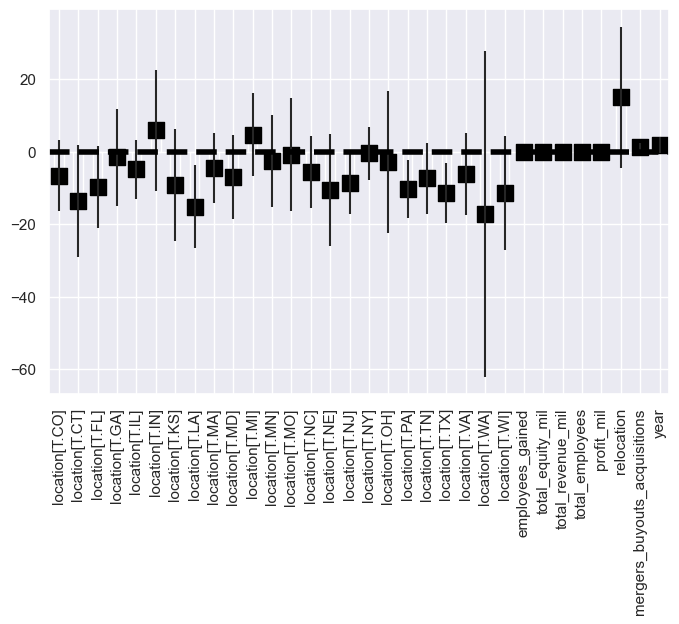

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))
location_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(location_df.shape[0]), 
           marker='s', s=120, 
           y=location_df['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['employees_gained',
       'total_equity_mil', 'total_revenue_mil', 'total_employees',
       'profit_mil', 'relocation', 'mergers_buyouts_acquisitions', 'year',], 
                       rotation=0, fontsize=16)

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


ModuleNotFoundError: No module named 'xgboost'

In [ ]:
df_aero=df_clean[df_clean['sector']=='Aerospace & Defense']
df_business=df_clean[df_clean['sector']=='Business Services']
df_energy=df_clean[df_clean['sector']=='Energy']
df_financials=df_clean[df_clean['sector']=="Financials"]
df_food_drug=df_clean[df_clean['sector']=='Food & Drug Stores']
df_food_bev=df_clean[df_clean['sector']=='Food, Beverages & Tobacco']
df_health=df_clean[df_clean['sector']=='Health Care']
df_hotels=df_clean[df_clean['sector']=='Hotels, Restaurants & Leisure']
df_industrials=df_clean[df_clean['sector']=='Industrials']
df_materials=df_clean[df_clean['sector']=='Materials']
df_motor=df_clean[df_clean['sector']=='Motor Vehicles & Parts']
df_retailing=df_clean[df_clean['sector']=='Retailing']
df_tech=df_clean[df_clean['sector']=='Technology']
df_telecom=df_clean[df_clean['sector']=='Telecommunications']
df_transportation=df_clean[df_clean['sector']=='Transportation']

In [ ]:
df_aero

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
60,-12.477,Boeing,IL,Aerospace & Defense,-20100.0,-18075.0,76559,161100,636,0,0,1970-01-01 00:00:00.000002020,Aerospace & Defense
61,0.709,Boeing,IL,Aerospace & Defense,1000.0,-14846.0,58158,141000,11873,0,0,1970-01-01 00:00:00.000002021,Aerospace & Defense
62,9.859,Boeing,IL,Aerospace & Defense,14000.0,-15848.0,62286,142000,4202,0,0,1970-01-01 00:00:00.000002022,Aerospace & Defense
200,3.636,Lockheed Martin,MD,Aerospace & Defense,4000.0,6038.0,59812,110000,6230,0,2,1970-01-01 00:00:00.000002020,Aerospace & Defense
201,0.000,Lockheed Martin,MD,Aerospace & Defense,0.0,10959.0,65398,114000,6833,0,0,1970-01-01 00:00:00.000002021,Aerospace & Defense
202,1.754,Lockheed Martin,MD,Aerospace & Defense,2000.0,9266.0,67044,114000,6315,0,0,1970-01-01 00:00:00.000002022,Aerospace & Defense


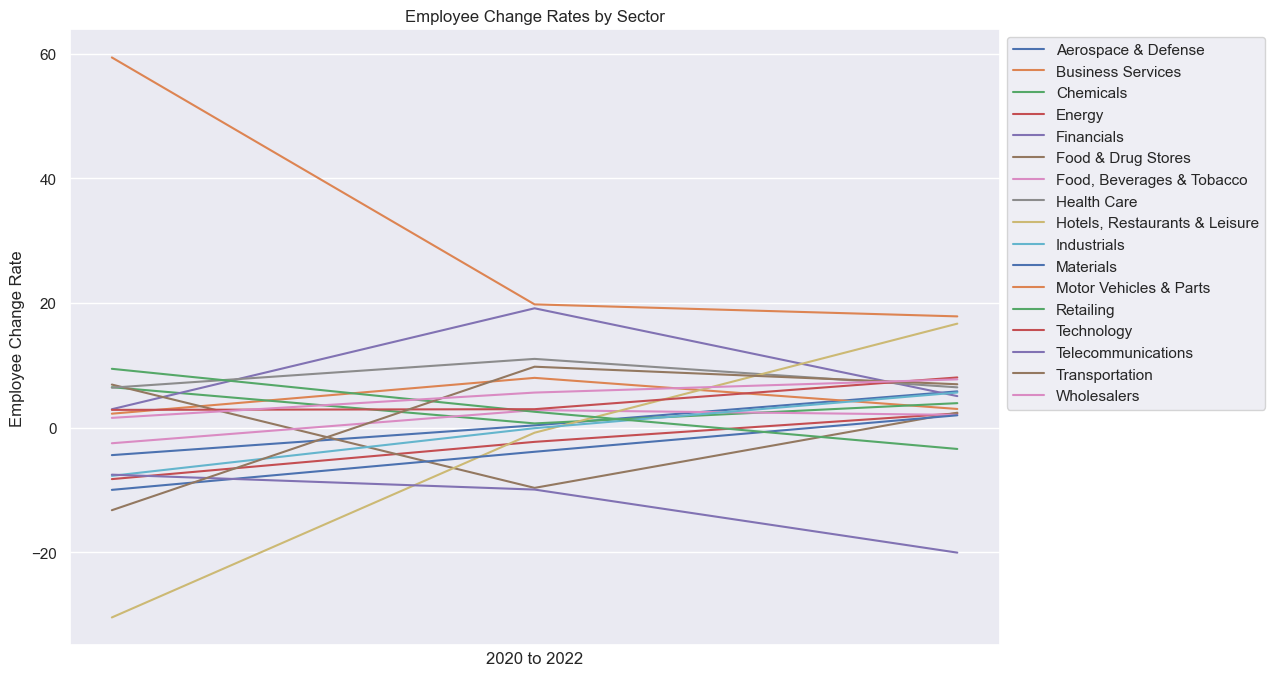

In [1083]:

# Convert the 'Date' column to datetime format

df_clean['year'] = pd.to_datetime(df_clean['year'])

 

# Group by sector and calculate the mean change rate for each sector

aero_df = df_clean.groupby(['sector', 'year'])['employment_change_rate'].mean().reset_index()

 

# Pivot the DataFrame to have sectors as columns

pivot_df = aero_df.pivot(index='year', columns='sector', values='employment_change_rate')

 

# Plotting

plt.figure(figsize=(12, 8))

 

for sector in pivot_df.columns:

    plt.plot(pivot_df.index, pivot_df[sector], label=sector)

 

# Adding labels and title

plt.xlabel('2020 to 2022')

plt.ylabel('Employee Change Rate')

plt.title('Employee Change Rates by Sector')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

 

# Display the plot

plt.show()

 

In [1078]:
df_clean

,employment_change_rate,company,location,industry,employees_gained,total_equity_mil,total_revenue_mil,total_employees,profit_mil,relocation,mergers_buyouts_acquisitions,year,sector
0,2.025,AES,VA,Utilities: Gas and Electric,162.0,4720.0,10189,8000,303,0,0,2020,Energy
1,3.529,AES,VA,Utilities: Gas and Electric,288.0,4567.0,9660,8162,46,0,3,2021,Energy
2,7.692,AES,VA,Utilities: Gas and Electric,650.0,4504.0,11141,8450,409,0,0,2022,Energy
4,-6.522,Alcoa,PA,Metals,-900.0,5016.0,10433,13800,1125,0,0,2020,Materials
5,-5.426,Alcoa,PA,Metals,-700.0,6284.0,9286,12900,170,0,0,2021,Materials
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,-5.685,Vistra,TX,Energy,-305.0,8292.0,11443,5365,636,0,1,2021,Energy
298,-2.964,Vistra,TX,Energy,-150.0,4918.0,12077,5060,1274,0,0,2022,Energy
300,6.604,Zoetis,NJ,Pharmaceuticals,700.0,3773.0,6260,10600,1500,0,2,2020,Health Care
301,7.080,Zoetis,NJ,Pharmaceuticals,800.0,4544.0,6675,11300,1638,0,2,2021,Health Care
